# 1. Conditional problems

### Забара Илья

## №1.1 Hobbit village (Gradient descent + Newton method + Gradient descent in conditional optimization)

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
sns.set()

Функция построения графика деревни:

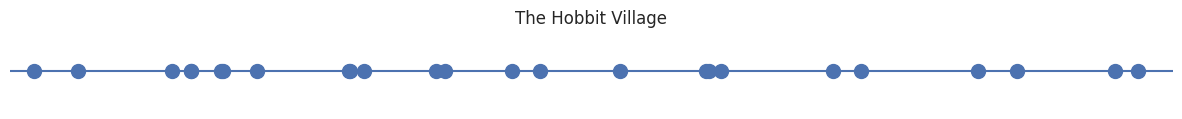

In [ ]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'

    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)

    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

N = 25
l = 1
np.random.seed(42)
x = np.random.rand(N)*l

plot_village(x, l)

Жители одномерной деревни хотят подключиться к Интернету, поэтому им нужна центральная станция обслуживания, от которой кабель протянется ко всем домам в деревне. Пусть цена кабеля, который будет протянут от станции к каждому дому независимо, определяется некоторой функцией p(d). Тогда понятно, что за доступ к Всемирной паутине деревне придется заплатить следующую сумму:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|),
$$

где $w$ - местоположение станции, $x_i$ - местоположение $i$-го дома.

1\. Выпишем аналитическое решение в случае $p(d)=d^2$.

В данном случае, очевидно, имееем выпуклую квадартичную задачу безусловной оптимизации. Найденная стационарная точка будет решением задачи:
$$
P(\omega, x)=(x_1-\omega)^2+(x_2-\omega)^2+...+(x_N-\omega)^2
$$
$$
\nabla_{\omega}P(\omega^*, x)=(\omega^*-x_1)+(\omega^*-x_2)+...+(\omega^*-x_N)=0\Rightarrow \boxed{\omega^*=\dfrac{x_1+x_2+...+x_N}{N}}.
$$

2\. Определим функцию потерь $P(\omega, x)$:

In [ ]:
def P(w: float, x: np.ndarray) -> float:
    return ((x-w)**2).sum()

3\. Построим её графике при $\omega\in(0, l)$:

Text(0.5, 1.0, 'Loss function with $p(d)=d^2$')

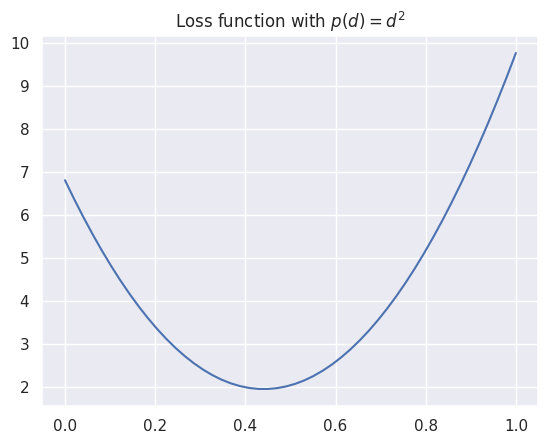

In [ ]:
ws = np.linspace(0, 1)
plt.plot(ws, [P(w, x) for w in ws])
plt.title(r'Loss function with $p(d)=d^2$')

4\. Теперь определим градиент функции потерь:

In [ ]:
def dP(w: float, x: np.ndarray) -> float:
    return (2*(w-x)).sum()

5\. Теперь построим график этого градиента при $\omega\in(0, l)$:

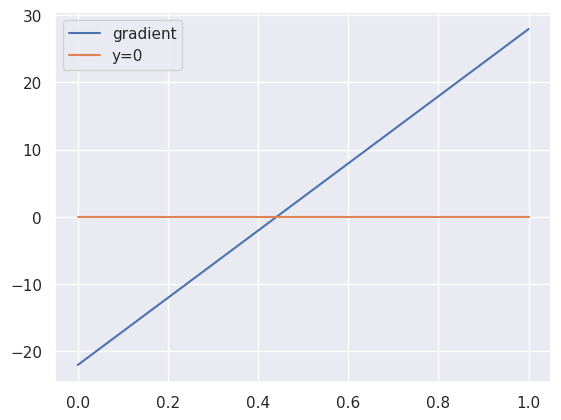

In [ ]:
plt.plot(ws, [dP(w, x) for w in ws], label='gradient')
plt.plot(ws, [0 for w in ws], label='y=0')
plt.legend()

В данном случае интерес представляет точка пересечения графика градиента и прямой $y=0$. Так как именно точка, в которой обнулется градиент в данном случае является оптимальной.

6\. Определим функцию градиентного спуска, возвращающую состояние оптимизационной переменной после фиксированного количества шагов:

In [ ]:
w0 = np.random.rand()*l

def gradient_descent(x, dP, w0, mu, Nsteps: int = 100):
    w = w0
    trajectory = [w]
    for _ in range(Nsteps):
        grad = dP(w, x)
        w = w - mu * grad
        trajectory.append(w)

    return w, trajectory

7\. Теперь посмотрим траекторию при оптимизации функции потерь при разных значениях $\mu$ для 100 шагов GD:

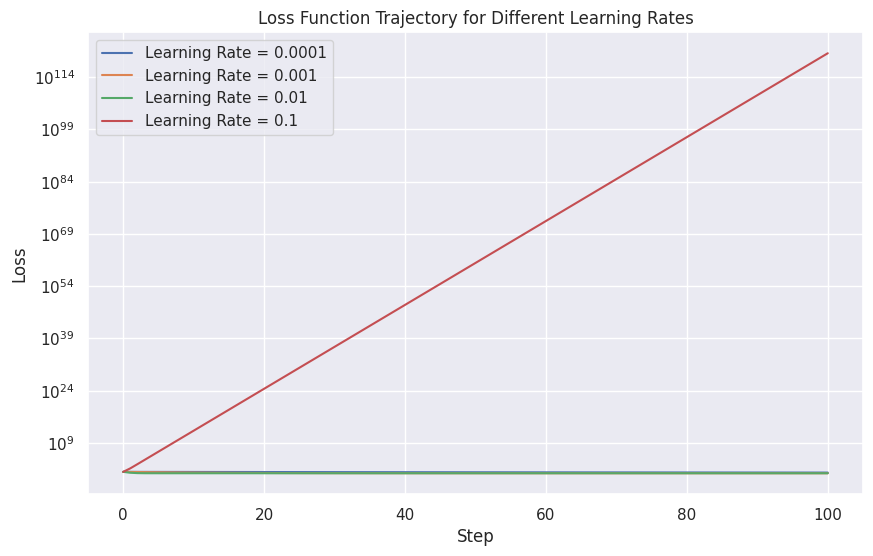

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
Nsteps = 100

trajectories = {}

for mu in learning_rates:
    ws = gradient_descent(x, dP, w0, mu, Nsteps)[1]
    losses = [P(w, x) for w in ws]
    trajectories[mu] = losses

plt.figure(figsize=(10, 6))
for mu, loss_trajectory in trajectories.items():
    plt.plot(loss_trajectory, label=f"Learning Rate = {mu}")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss Function Trajectory for Different Learning Rates")
plt.yscale('log')
plt.legend()
plt.show()

Видим, что при $\mu=0.1$ расходимость. Построим график без него:

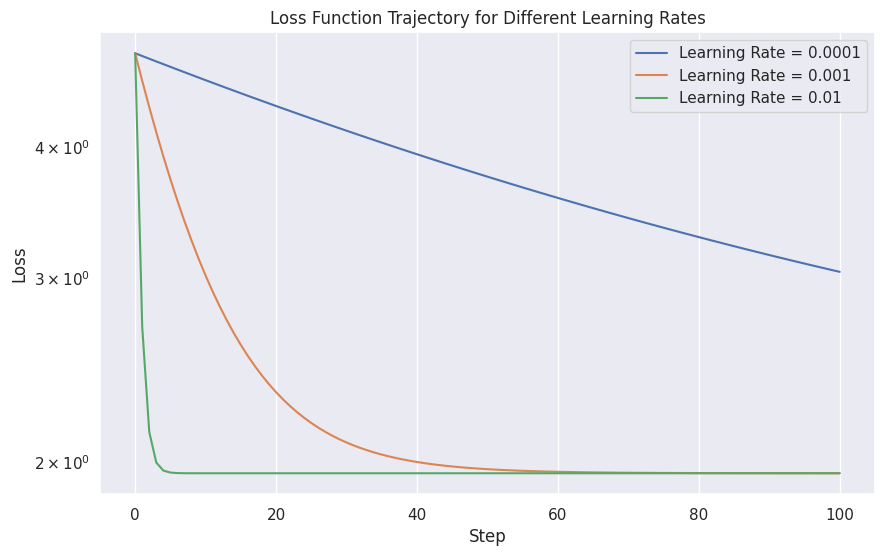

In [ ]:
plt.figure(figsize=(10, 6))
del trajectories[0.1]
for mu, loss_trajectory in trajectories.items():
    if mu == 0.1:
        continue
    plt.plot(loss_trajectory, label=f"Learning Rate = {mu}")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss Function Trajectory for Different Learning Rates")
plt.yscale('log')
plt.legend()
plt.show()

8\. В деревне решили проложить кабель по новой технологии. Вот почему цена на кабель изменилась на:
$$
p(d) = |d|.
$$

Определим новые функции $P$ и субградиента $dP$:

In [ ]:
def P(w, x):
    return np.abs(x - w).sum()

def dP(w, x):
    return np.sign(w - x).sum()

Построим график для новой функции потерь:

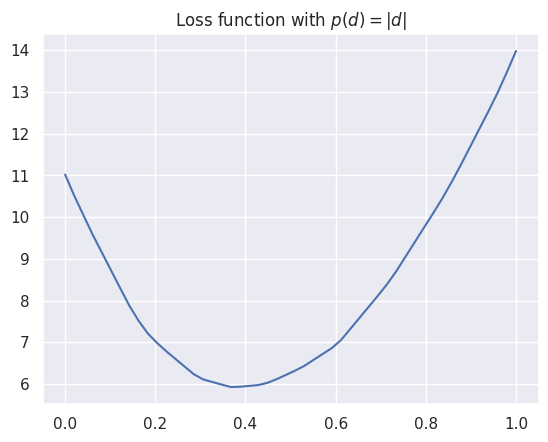

In [ ]:
ws = np.linspace(0, 1)
loss_values = [P(w, x) for w in ws]

plt.plot(ws, loss_values)
plt.title(r'Loss function with $p(d)=|d|$')
plt.grid(True)
plt.show()

9\. Найдём решение $\omega^*$ аналитически. По лемме Ферма $\omega^*$ - решение тогда и только тогда, когда $0\in\partial f(\omega^*)$. Субградиент
$$
g = sign(\omega - x_1) + sign(\omega - x_2) + ... +sign(\omega - x_N) = 0
$$

в том и только в том случае, когда количество домов слева и справа от станции одинаковое. Таким образом оптимальное значение можно задать как 0.5-квантиль выборки расположения домов $x$:

In [ ]:
def optimal_w(x):
    return np.quantile(x, 0.5)

Посмотрим на рисунок, чтобы убедиться:

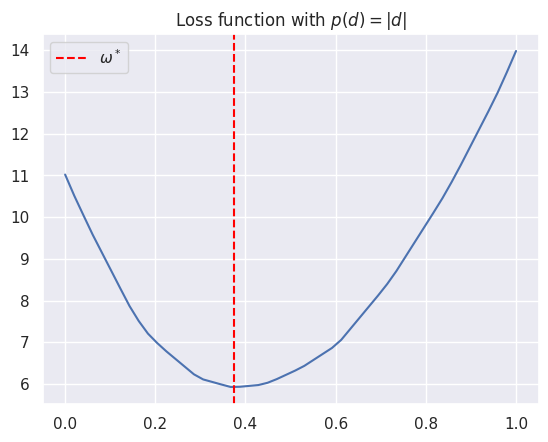

In [ ]:
w_star = optimal_w(x)

plt.plot(ws, loss_values)
plt.axvline(w_star, color='red', linestyle='--', label=r'$\omega^*$')
plt.title(r'Loss function with $p(d)=|d|$')
plt.legend()
plt.grid(True)
plt.show()

10\. Теперь построим траектории функции потерь при SubGD для нового $p(d)$:

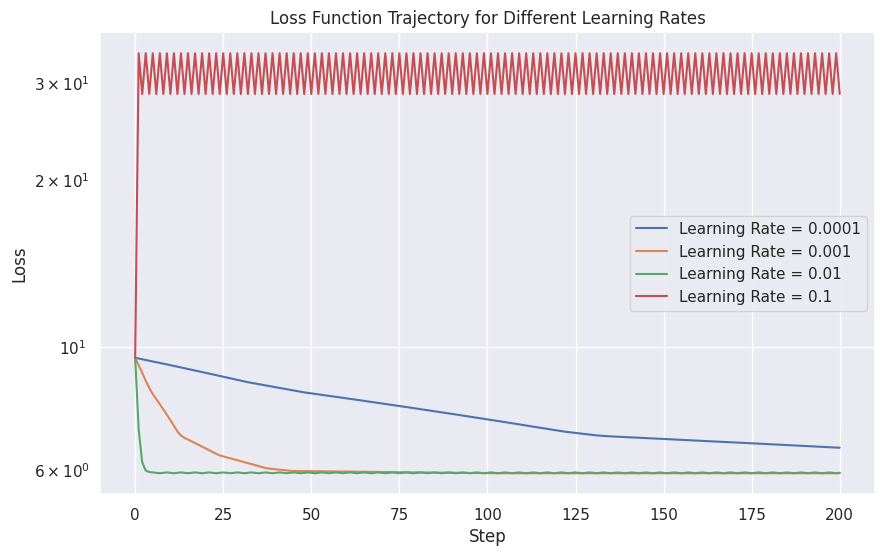

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
Nsteps = 200

trajectories = {}

for mu in learning_rates:
    ws = gradient_descent(x, dP, w0, mu, Nsteps)[1]
    losses = [P(w, x) for w in ws]
    trajectories[mu] = losses

plt.figure(figsize=(10, 6))
for mu, loss_trajectory in trajectories.items():
    plt.plot(loss_trajectory, label=f"Learning Rate = {mu}")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss Function Trajectory for Different Learning Rates")
plt.yscale('log')
plt.legend()
plt.show()

Как и прежде, для $\mu=0.1$ нет сходимости, ещё наблюдаем чаттеринг. Для остальных значений наблюдается сходимотсь. Построим график только для них:

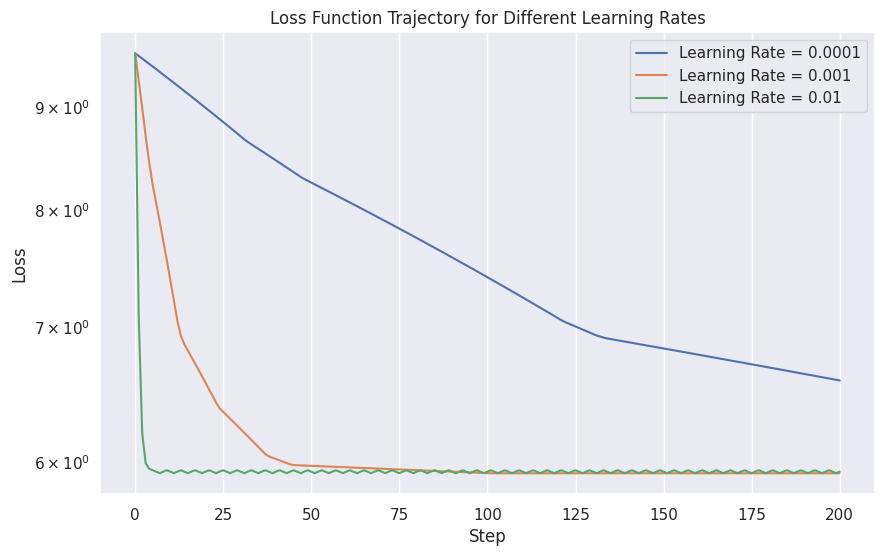

In [ ]:
plt.figure(figsize=(10, 6))
for mu, loss_trajectory in trajectories.items():
    if mu == 0.1:
        continue
    plt.plot(loss_trajectory, label=f"Learning Rate = {mu}")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss Function Trajectory for Different Learning Rates")
plt.yscale('log')
plt.legend()
plt.show()

Видим также небольшой чаттеринг для зелёной траектории.

11\. Через несколько лет правительство предложило уничтожить первую станцию, но выбрать места для двух новых станций. В этих условиях стоимость подключения всего дома рассчитывается по новой формуле:
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)=\sum\limits_{i=1}^N p(\min(f_1, f_2)).
$$

Определим новые функции $P$, $dP$ и $dP_{sigma}$:

In [ ]:
def P(w1, w2, x):
    return np.sum([min(abs(w1 - xi), abs(w2 - xi)) for xi in x])

def dP(w1, w2, x):
    """
       функция градиента;
       если на доме x_i активна функция f_1 или f_2, то слагаемым в сумму идёт соответствующий i-й субградиент, иначе 0
    """
    nabla_w1 = np.sum(np.where(np.abs(w1 - x) < np.abs(w2 - x), np.sign(w1 - x), 0))
    nabla_w2 = np.sum(np.where(np.abs(w1 - x) > np.abs(w2 - x), np.sign(w2 - x), 0))
    return np.array([nabla_w1, nabla_w2])

def dP_sigma(w1, w2, x, p):
    """
        cтохастический градиент;
        использует случайное подмножество домов для вычисления градиента
    """
    N = np.shape(x)[0]
    k = int(p * N)  # Количество случайно выбранных домов

    # Случайный выбор подмножества домов
    random_indices = np.random.choice(N, k, replace=False)
    x_random = x[random_indices]

    # Вычисление градиента с использованием случайного подмножества
    nabla_w1 = np.sum(np.where(np.abs(w1 - x_random) < np.abs(w2 - x_random), np.sign(w1 - x_random), 0))
    nabla_w2 = np.sum(np.where(np.abs(w1 - x_random) > np.abs(w2 - x_random), np.sign(w2 - x_random), 0))

    return np.array([nabla_w1, nabla_w2])

12\. Теперь построим графики для $P(w_1, w_2)$ и поле градиентов $\nabla P(w_1, w_2)$ при различных количествах домов $N$. Сначала посмотрим для тех же 25-ти домов:

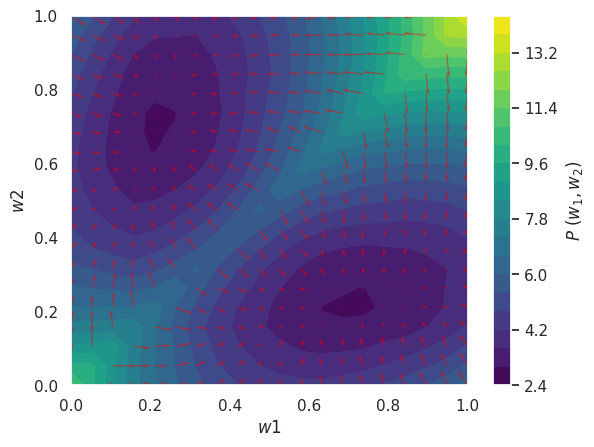

In [ ]:
ws1, ws2 = np.linspace(0, 1, 20), np.linspace(0, 1, 20)
P_vals = np.array([[P(w1, w2, x) for w1 in ws1] for w2 in ws2])
plt.contourf(ws1, ws2, P_vals, levels=20, cmap='viridis')
plt.colorbar(label=r'$P \ (w_1, w_2)$')

# поле градиентов
w1, w2 = np.meshgrid(ws1, ws2)
gradients = np.array([-dP(w1[i, j], w2[i, j], x) for i in range(len(ws1)) for j in range(len(ws2))])
u = gradients[:, 0].reshape(w1.shape)
v = gradients[:, 1].reshape(w2.shape)
plt.quiver(w1, w2, u, v, color='red', alpha=0.5)

plt.xlabel(r'$w1$')
plt.ylabel(r'$w2$')
plt.show()

Функция явно не выпуклая и имеет две точки минимума.

Теперь будем увеличивать количество домов от $N=3$ до $N=100$. Стохастика для наглядности при этом должна быть фиксированна (seed в 1-й ячейке с кодом). Создадим анимацию:

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

def update_plot(frame, x, ws1, ws2):
    x = np.random.rand(frame) * l
    plt.clf()
    P_vals = np.array([[P(w1, w2, x[:frame]) for w1 in ws1] for w2 in ws2])
    plt.contourf(ws1, ws2, P_vals, levels=20, cmap='viridis')
    plt.colorbar(label=r'$P \ (w_1, w_2)$')

    # Поле градиентов
    w1, w2 = np.meshgrid(ws1, ws2)
    gradients = np.array([-dP(w1[i, j], w2[i, j], x[:frame]) for i in range(len(ws1)) for j in range(len(ws2))])
    u = gradients[:, 0].reshape(w1.shape)
    v = gradients[:, 1].reshape(w2.shape)
    plt.quiver(w1, w2, u, v, color='red', alpha=0.5)

    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.title(fr'Количество жителей $N={frame}$')

fig = plt.figure()
ani = animation.FuncAnimation(
    fig,
    update_plot,
    frames=range(3, 100, 2),
    fargs=(x, ws1, ws2),
    repeat=False,
    interval=500
)

HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

В целом, для большого количества домов качественно вид картины меняется не сильно (меняются размеры впадин около экстремумов). Но когда количесвто домов малое (начиная с трёх), график более угловатый (ромбовидный), на первых 20-ти домах график значительно меняет свою форму. С увилечением количества домов он "сглаживается" и "скругляется". Также орбратите внимание на тепловые шкалы справа от каждого графика. Значения в них для большего числа жителей становится больше, что не удивительно, ведь увеличивается количество слагаеммых в сумме.

13\. Далее определим новую функцию для GD и получения траектории:

In [ ]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    w = np.array(w0)
    trajectory = [w]

    for _ in range(Nsteps):
        grad = dP(w[0], w[1], x)
        w = w - mu * grad
        trajectory.append(w.copy())

    trajectory = np.array(trajectory)
    return trajectory

Теперь построим траекторию для количества домов $N=50$ и начальной точки, к примеру, $(0.9; \  0.8)$. Значение learning rate выберем, к примеру, равным $0.005$:

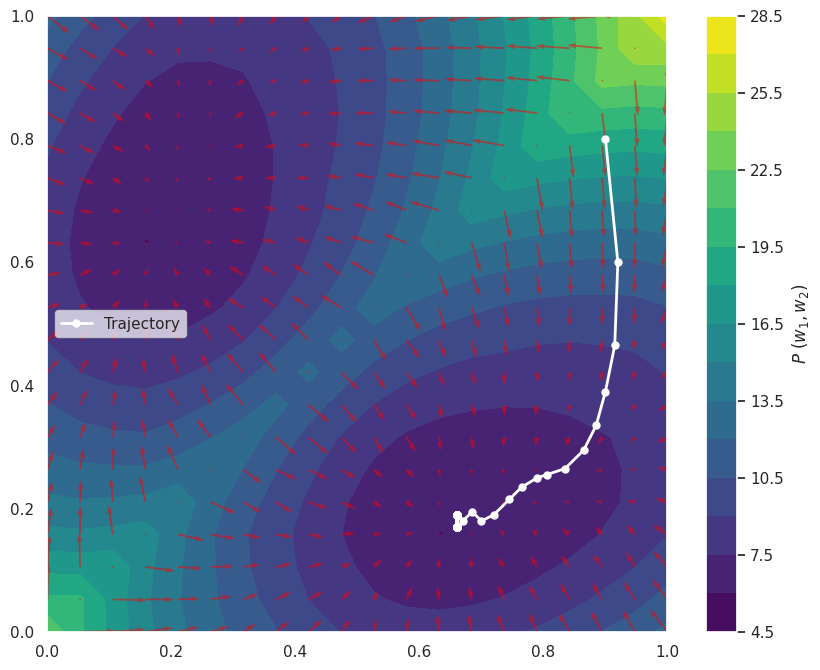

In [ ]:
w0 = [0.9, 0.8]
np.random.seed(42)
x = np.random.rand(50)*l
trajectory = gradient_descent(x, dP, w0, 0.005, 100)

ws1, ws2 = np.linspace(0, 1, 20), np.linspace(0, 1, 20)
P_vals = np.array([[P(w1, w2, x) for w1 in ws1] for w2 in ws2])
plt.figure(figsize=(10, 8))
plt.contourf(ws1, ws2, P_vals, levels=20, cmap='viridis')
plt.colorbar(label=r'$P \ (w_1, w_2)$')

w1_mesh, w2_mesh = np.meshgrid(ws1, ws2)
gradients = np.array([-dP(w1_mesh[i, j], w2_mesh[i, j], x) for i in range(len(ws1)) for j in range(len(ws2))])
u = gradients[:, 0].reshape(w1.shape)
v = gradients[:, 1].reshape(w2.shape)
plt.quiver(w1_mesh, w2_mesh, u, v, color='red', alpha=0.5)

plt.plot(
    trajectory[:, 0], trajectory[:, 1],
    linestyle='-',
    marker='o',
    markersize = 5,
    color='white',
    linewidth=2,
    label='Trajectory'
)

plt.legend()
plt.show()

Видим, что при таком начальном приближении GD сходится к правому минимуму.

14\. Строительство почти завершено, но новые правила техники безопасности не позволяют станциям находиться на расстоянии более 1/2
$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}.
$$

Нарисуем это множество:

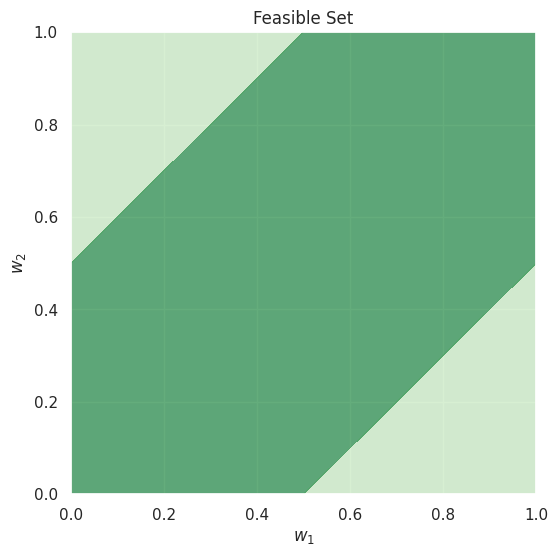

In [ ]:
feasible = np.abs(w1_mesh - w2_mesh) <= l / 2

plt.figure(figsize=(6, 6))
plt.contourf(w1_mesh, w2_mesh, feasible, cmap='Greens', alpha=0.7)
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.title("Feasible Set")
plt.show()

Как легко видеть, множество является выпуклым.

15\. Далее для решения этой задачи с ограничениями напишем процедуру PGD (проекция после шага GD), а также PSGD (проекция после шага SGD):

In [ ]:
def projection(w):
    if abs(w[0]-w[1]) > l/2:
        if w[0] > w[1]:
            mid = (w[0] + w[1]) / 2
            w[0] = mid + (l / 4)
            w[1] = mid - (l / 4)
        else:
            mid = (w[0] + w[1]) / 2
            w[0] = mid - (l / 4)
            w[1] = mid + (l / 4)
    return w

def projected_GD(x, dP, w0, mu, Nsteps):
    w = np.array(w0)
    trajectory = [w]
    for _ in range(Nsteps):
        grad = dP(w[0], w[1], x)
        w = w - mu * grad
        w = projection(w)
        trajectory.append(w.copy())

    return w, np.array(trajectory)

def projected_SGD(x, dP_sigma, w0, mu, Nsteps, p=0.4):
    w = np.array(w0)
    trajectory = [w]
    for _ in range(Nsteps):
        grad = dP_sigma(w[0], w[1], x, p)
        w = w - mu * grad
        w = projection(w)
        trajectory.append(w.copy())

    return w, np.array(trajectory)

Запустим процедуру PGD и PSGD с теми же начальными данными что и ранее и посмотрим на траекторию. В целях наглядного сравнения запустим одновременно и отразим на графике траекторию GD, PGD, PSGD. Количество домов выбрем 35, learning rate равным 0.001:

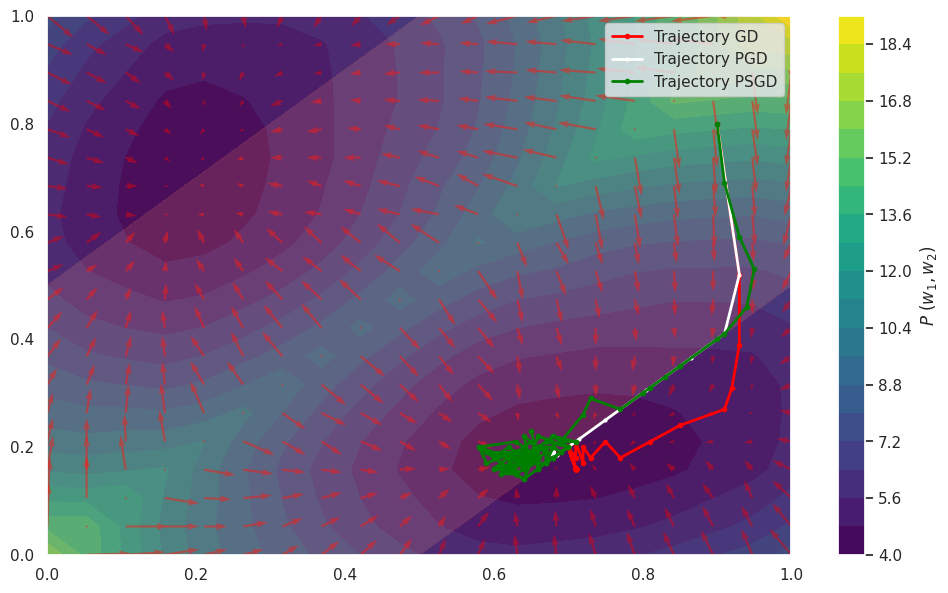

Solution GD: (0.7, 0.2)
Solution PGD: (0.68, 0.18)


In [ ]:
w0 = [0.9, 0.8]
np.random.seed(42)
x = np.random.rand(35)*l
w_opt_PGD, trajectory_PGD = projected_GD(x, dP, w0, 0.01, 100)
w_opt_PSGD, trajectory_PSGD = projected_SGD(x, dP_sigma, w0, 0.01, 100, p=0.4)
trajectory_GD = gradient_descent(x, dP, w0, 0.01, 100)
w_opt_GD = trajectory_GD[-1]

ws1, ws2 = np.linspace(0, 1, 20), np.linspace(0, 1, 20)
P_vals = np.array([[P(w1, w2, x) for w1 in ws1] for w2 in ws2])
plt.figure(figsize=(12, 7))
plt.contourf(ws1, ws2, P_vals, levels=20, cmap='viridis')
plt.colorbar(label=r'$P \ (w_1, w_2)$')

w1_mesh, w2_mesh = np.meshgrid(ws1, ws2)
gradients = np.array([-dP(w1[i, j], w2[i, j], x) for i in range(len(ws1)) for j in range(len(ws2))])
u = gradients[:, 0].reshape(w1.shape)
v = gradients[:, 1].reshape(w2.shape)
plt.quiver(w1_mesh, w2_mesh, u, v, color='red', alpha=0.5)

plt.contourf(w1_mesh, w2_mesh, feasible, alpha=0.2)

plt.plot(
    trajectory_GD[:, 0], trajectory_GD[:, 1],
    linestyle='-',
    marker='o',
    markersize = 3,
    color='red',
    linewidth=2,
    label='Trajectory GD'
)

plt.plot(
    trajectory_PGD[:, 0], trajectory_PGD[:, 1],
    linestyle='-',
    marker='o',
    markersize = 2,
    color='white',
    linewidth=2,
    label='Trajectory PGD'
)

plt.plot(
    trajectory_PSGD[:, 0], trajectory_PSGD[:, 1],
    linestyle='-',
    marker='o',
    markersize = 3,
    color='green',
    linewidth=2,
    label='Trajectory PSGD'
)

plt.legend()
plt.show()
print(f'Solution GD: ({round(w_opt_GD[0], 2)}, {round(w_opt_GD[1], 2)})')
print(f'Solution PGD: ({round(w_opt_PGD[0], 2)}, {round(w_opt_PGD[1], 2)})')

Видим, что белая траектория действительно соответствует тракектории PGD относительно заданного допустимого множества, полученное решение принадлежит допустимому множеству. Стохастический PSGD также траекторно не покидает допустимое множество, но в окрестности решения нет сходимости, метод "прыгает" над локальным оптимумом. Для борьбы с этим стоит либо брать меньший $\mu$, либо уменьшать его с ростом итерации.

16\. Имеем следующую функцию потерь (была в начале):
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|),
$$
где $p(d) = d^2$.

Определим P, dP, ddP. ddP будет возвращать её гессиан, который в случае одной пременной представляет собой число и равен
$$
\nabla^2P(\omega, x) = 2+2+...+2=2N
$$

In [ ]:
def P(w: float, x: np.ndarray) -> float:
    return ((x-w)**2).sum()

def dP(w: float, x: np.ndarray) -> float:
    return (2*(w-x)).sum()

def ddP(w: float, x: np.ndarray) -> float:
    return 2 * np.shape(x)[0]

17\. Построим график ddP:

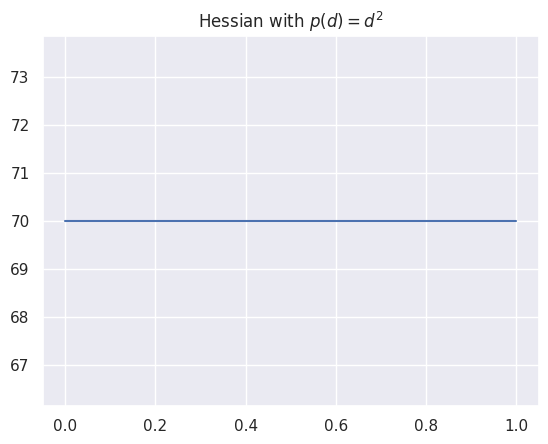

In [ ]:
ws = np.linspace(0, 1)
plt.plot(ws, [ddP(w, x) for w in ws])
plt.title(r'Hessian with $p(d)=d^2$')
plt.show()

Как и ожидалось, график есть горизонтальная прямая линия на высоте 2*(кол-во) домов.

18\. Далее напишем функцию для траектории в методе Ньютона для такой функции одной переменной:

In [ ]:
def newton_descent(x, dP, ddP, w0, Nsteps):
    w = w0
    trajectory = [w]
    for _ in range(Nsteps):
        grad = dP(w, x)
        reverse_hess = 1 / ddP(w, x)
        w = w - reverse_hess * grad
        trajectory.append(w.copy())
    return w, np.array(trajectory)

Запустим процедуру и нарисуем поведение функции:

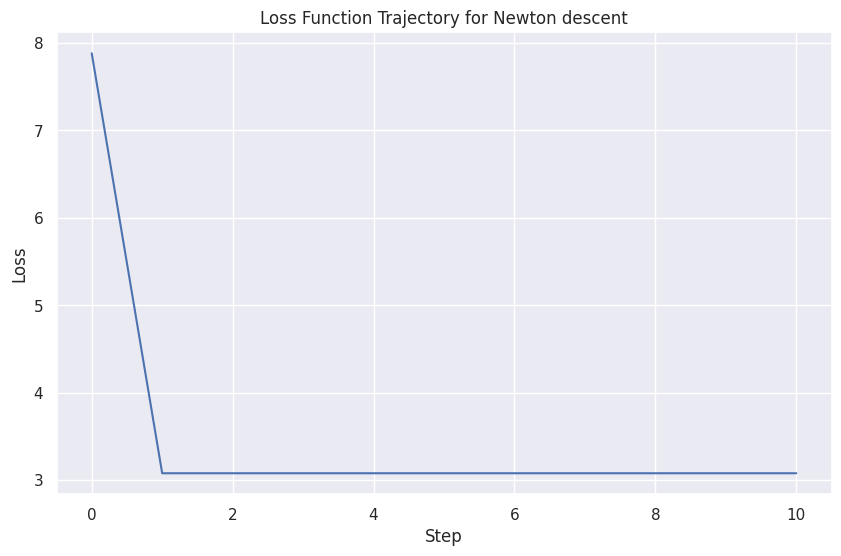

In [ ]:
w0 = np.random.rand()*l
w_opt, ws_newton_trajectory = newton_descent(x , dP, ddP, w0, 10)
losses = [P(w, x) for w in ws_newton_trajectory]

plt.figure(figsize=(10, 6))
plt.plot(losses)

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss Function Trajectory for Newton descent")
plt.show()

Метод Ньютона сошёлся за одну итерацию. Посмотрим на решение более наглядно:

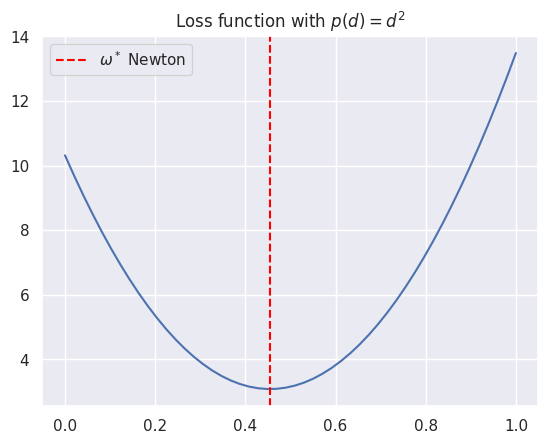

In [ ]:
ws = np.linspace(0, 1)
loss_values = [P(w, x) for w in ws]
plt.plot(ws, loss_values)
plt.axvline(w_opt, color='red', linestyle='--', label=r'$\omega^*$ Newton')
plt.title(r'Loss function with $p(d)=d^2$')
plt.legend()
plt.grid(True)
plt.show()

19\. Теперь решаем 2D задачу
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right),
$$

где $p(d) = d^3$. Используем метод Ньютона, затем сравним с GD. Гессиан тут, очевидно, будет диагональной матрицей. На диагоналях будут стоять значения, равные определяемые подобным градиенту образом.

In [ ]:
def P(w1, w2, x):
    return np.sum([min(abs(w1 - xi), abs(w2 - xi))**3 for xi in x])

def dP(w1, w2, x):
    nabla_w1 = np.sum(np.where(np.abs(w1 - x) < np.abs(w2 - x), 3*(w1 - x)*np.abs(w1-x), 0))  # суммы для домов, близких к станции w1
    nabla_w2 = np.sum(np.where(np.abs(w1 - x) > np.abs(w2 - x), 3*(w2 - x)*np.abs(w2-x), 0))  # суммы для домов, близких к станции w2
    return np.array([nabla_w1, nabla_w2])

def ddP(w1, w2, x):
    H11 = np.sum(np.where(np.abs(w1 - x) < np.abs(w2 - x), 6*(w1 - x)*np.sign(w1-x), 0))
    H22 = np.sum(np.where(np.abs(w1 - x) > np.abs(w2 - x), 6*(w2 - x)*np.sign(w2-x), 0))
    H12, H21 = 0., 0.
    return np.array([[H11, H12],[H21, H22]])

def multi_newton(x, dP, ddP, w0, Nsteps):
    w = np.array(w0)
    trajectory = [w.copy()]
    for _ in range(Nsteps):
        grad = dP(w[0], w[1], x)
        reverse_hess = np.linalg.inv(ddP(w[0], w[1], x))
        w = w - reverse_hess @ grad
        trajectory.append(w.copy())

    return np.array(trajectory)

Построим траекторию метода Ньютона с некоторым начальным приближением, на той же картинке построим траекторию GD ($\mu=0.01$) для сравнения:

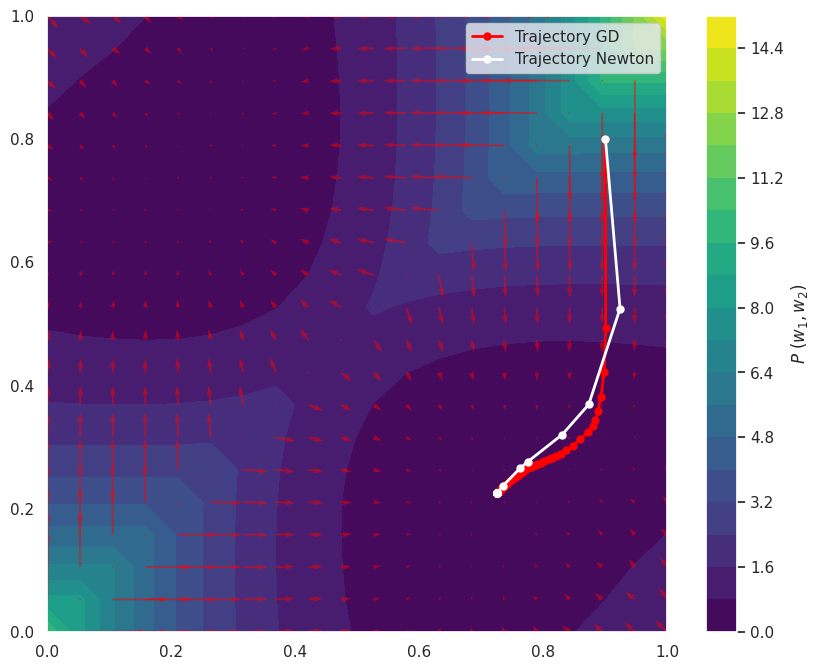

In [ ]:
w0 = [0.9, 0.8]
np.random.seed(42)
x = np.random.rand(50)*l
trajectory_multi_newton = multi_newton(x, dP, ddP, w0, 100)
trajectory_GD = gradient_descent(x, dP, w0, 0.01, 100)

ws1, ws2 = np.linspace(0, 1, 20), np.linspace(0, 1, 20)
P_vals = np.array([[P(w1, w2, x) for w1 in ws1] for w2 in ws2])
plt.figure(figsize=(10, 8))
plt.contourf(ws1, ws2, P_vals, levels=20, cmap='viridis')
plt.colorbar(label=r'$P \ (w_1, w_2)$')

w1_mesh, w2_mesh = np.meshgrid(ws1, ws2)
gradients = np.array([-dP(w1_mesh[i, j], w2_mesh[i, j], x) for i in range(len(ws1)) for j in range(len(ws2))])
u = gradients[:, 0].reshape(w1.shape)
v = gradients[:, 1].reshape(w2.shape)
plt.quiver(w1_mesh, w2_mesh, u, v, color='red', alpha=0.5)


plt.plot(
    trajectory_GD[:, 0], trajectory_GD[:, 1],
    linestyle='-',
    marker='o',
    markersize = 5,
    color='red',
    linewidth=2,
    label='Trajectory GD'
)


plt.plot(
    trajectory_multi_newton[:, 0], trajectory_multi_newton[:, 1],
    linestyle='-',
    marker='o',
    markersize = 5,
    color='white',
    linewidth=2,
    label='Trajectory Newton'
)

plt.legend()
plt.show()

Явно видно, что Ньютон сходится к оптимуму за гораздо меньшее число шагов. Давайте посмотрим на повдение функции при этих методах:

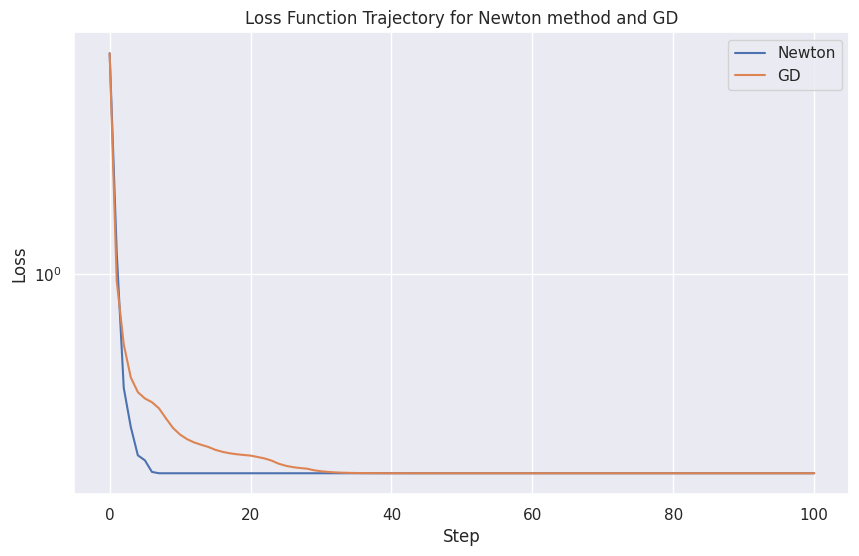

In [ ]:
losses_newton = [P(w[0], w[1], x) for w in trajectory_multi_newton]
losses_GD = [P(w[0], w[1], x) for w in trajectory_GD]

plt.figure(figsize=(10, 6))
plt.plot(losses_newton, label='Newton')
plt.plot(losses_GD, label=f'GD')

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss Function Trajectory for Newton method and GD")
plt.yscale('log')
plt.legend()
plt.show()

**<u>Ответ:</u>** все пункты выполнены; рассмотрены различные постановки задач в зависимости от функции суммарной стоимости $P(\omega, x)$; для безусловной задачи рассмотрены и сравнены разные методы (GD, Newton), для задачи с простыми ограничениями рассмотрен метод проекции градиента.

## №1.2 Frank - Wolfe vs Projected gradient descent

Решаем следующую квадратичную задачу с ограничениями:
$$
f(x) = \frac12 \langle Ax, x \rangle - \langle b, x \rangle \to \min\limits_{x \in \mathbb{R}^n; \; 1^\top x = 1, \; x \succeq 0}
$$

1\. Сгенерируем и решим задачу численно с помощью *CVXPY*:

In [ ]:
import jax
from jax import numpy as jnp
from jax import random
from jax import grad
import cvxpy as cp

def generate_problem(n, mu=0, L=10):
    RNG = random.PRNGKey(0)

    U = random.normal(RNG, (n, n))
    Q, _ = jnp.linalg.qr(U)

    Lambda = jnp.diag(jnp.linspace(mu, L, n, endpoint=True))

    A = Q @ Lambda @ Q.T

    RNG, _ = random.split(RNG)
    b = random.normal(RNG, (n, 1))

    # Function to optimize
    def f(x, A=A, b=b):
        return 1/2 * x.T @ A @ x - b.T @ x

    grad_f = grad(f)

    # Starting point
    RNG, _ = random.split(RNG)
    x_0 = jnp.zeros(n)
    idx = random.randint(RNG, (1,), 0, n)
    x_0 = x_0.at[idx].set(1.0)

    return f, grad_f, A, b, x_0

def compute_optimal(A, b):
    n = A.shape[0]
    x = cp.Variable(n, nonneg=True)
    constraints = [cp.sum(x) == 1]
    objective = cp.Minimize(0.5 * cp.quad_form(x, A, assume_PSD=True) - cp.matmul(b.T, x))
    problem = cp.Problem(objective, constraints)
    problem.solve()
    return x.value, problem.value

Сгенирируем задачу размерности 5 и найдём её решение:

In [ ]:
f, grad_f, A, b, x_0 = generate_problem(5)
b = b.reshape(-1)
x_optimal_cvxpy, f_optimal_cvxpy = compute_optimal(A, b)
print("Численное решение CVXPY:")
print(np.around(x_optimal_cvxpy, 5))
print("Оптимальное значение:")
print(f_optimal_cvxpy)

Численное решение CVXPY:
[0.41692 0.      0.49341 0.08968 0.     ]
Оптимальное значение:
-1.1163985527382347


2\. Начнем с PGD. Запишем функцию, которая вычисляет евклидову проекцию на симплекс:

In [ ]:
def projection(y: np.ndarray) -> np.ndarray:
    """https://arxiv.org/pdf/1309.1541.pdf
    """

    u = np.sort(y)[::-1]  # сортируем по убыванию

    # Находим значение rho
    cumulative_sum = 1 - np.cumsum(u)
    j = np.arange(1, len(u) + 1)
    is_positive = u + 1 / j * cumulative_sum > 0
    rho = np.max(j[is_positive])

    lambd = 1 / rho * cumulative_sum[rho - 1]  # вычисляем lambda

    x = np.maximum(y + lambd, 0)  # получаем ответ

    return x

3\. Теперь напишем сам PGD, результатом которого будет траектория оптимизационной переменной, а также список времён, затраченных на каждую итерацию:

In [ ]:
import time

def PGD(A, b, x_0, iterations, alpha=0.001):
    x = np.array(x_0)
    trajectory = [x.copy()]
    time_trajectory = []

    for _ in range(iterations):
        start = time.time()
        grad = np.dot(A, x) - b
        x = x - alpha * grad
        x_pr = projection(x)
        x = x_pr
        end = time.time()
        time_trajectory.append(end - start)
        trajectory.append(x_pr)

    return np.array(trajectory), np.array(time_trajectory)

4\. Реализуем метод Франк-Вульфа. Прежде чем это делать проведём анализ. На каждой итерации алгоритма решаетсяя подзадача поиска условного минимума тейлоровской аппроксимации $f^I_{x_k}=f(x_k)+\langle \nabla f(x_k), x-x_k \rangle$. Требуется определить
$$
s_k = arg\min_{x\in S} f^I_{x_k} = arg\min_{x\in S} \langle \nabla f(x_k), x \rangle
$$

В нашем случае ($x$ принадлежит единичному сиплексу) ответ виден сразу: $x$ должен состоять из всех нулей и одной единицы на позиции, соответсвующей позиции минимального значения в векторе градиента.

In [ ]:
def FW(A, b, x_0, iterations, gamma=0.9):
    x = np.array(x_0)
    trajectory = [x.copy()]
    time_trajectory = []

    for i in range(iterations):
        start = time.time()
        grad = np.dot(A, x) - b

        min_index = np.argmin(grad)
        s = np.zeros_like(grad)
        s[min_index] = 1

        x = gamma*x + (1-gamma)*s
        end = time.time()
        time_trajectory.append(end - start)
        trajectory.append(x)

    return np.array(trajectory), np.array(time_trajectory)

5\. Теперь берём уже сгенерированную и решённую через *CVXPY* выпуклую задачу с $\mu=0$ и $L=10$, решаем её написанными алгоритмами. Для $\gamma$ в методе Франк-Вульфа возьмём значение 0.85, для PGD возьмём оптимальное в данном классе задач значение шага $\alpha = 1/L=0.1$.

In [ ]:
iters = 150

trajectory_ProjGD, times_per_iter_PGD = PGD(A, b, x_0, iters, alpha=0.1)
x_star_ProjGD = np.array(trajectory_ProjGD[-1])

trajectory_FW, times_per_iter_FW = FW(A, b, x_0, iters, gamma=0.85)
x_star_FW = np.array(trajectory_FW[-1])

Когда генерировалась задача, вектор $b$ был размера (5, 1), т.е. как вектор-столбец, а не обычный массив, поэтому на после этапа генерации задачи был сделан b.reshape(-1). Чтобы не путаться, определим заново целевую функцию для построения нужного графика:

In [ ]:
def f(x, A, b):
    return 1 / 2 * np.dot(x, A @ x) - np.dot(b, x)

Построим требуемый график:

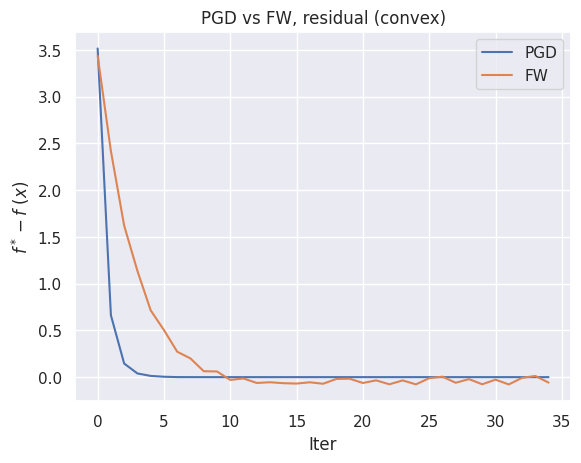

In [ ]:
# Значения целевой функции в оптимальных точках
f_star_ProjGD = f(x_star_ProjGD, A, b)
f_star_FW = f(x_star_FW, A, b)

# Массивы невязок
residual_PGD = [f(x, A, b) - f_star_ProjGD for x in trajectory_ProjGD]
residual_FW = [f(x, A, b) - f_star_FW for x in trajectory_FW]

plt.plot(residual_PGD[:35], label='PGD')
plt.plot(residual_FW[:35], label='FW')
plt.title('PGD vs FW, residual (convex)')
plt.ylabel(r'$f^*-f \ (x)$')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.show()

Видим, что метод проекции градиента по итерациям сходится несколько быстрее. Давайте посмотрим на время работы этих алгоритмов. Посмотрим только для тех итераций, для которых уменьшалось значение целевой функции:

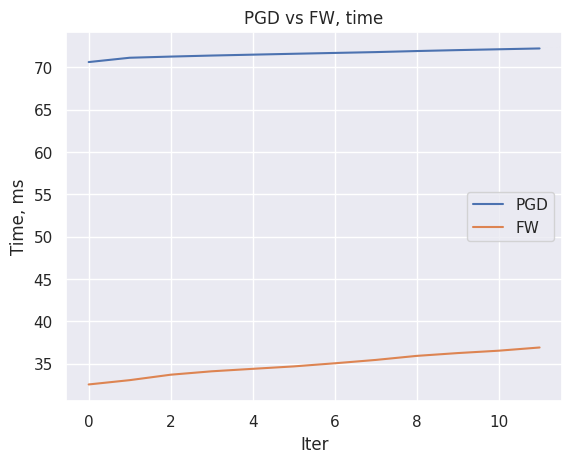

In [ ]:
times_PGD = np.cumsum(times_per_iter_PGD)
times_FW = np.cumsum(times_per_iter_FW)

plt.plot(times_PGD[:12] * 1000, label='PGD')
plt.plot(times_FW[:12] * 1000, label='FW')
plt.title('PGD vs FW, time')
plt.ylabel('Time, ms')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.show()

Видим, что Франк-Вульф работает немного быстрее PGD, что, по идее, и должно быть. В данном случае для PGD был использован довольно неплохой алгоритм $\mathcal{O}(n \cdot logn)$, вычисляющий проекцию, для FW на каждой итерации требуется только найти миниммум в массиве, а это $\mathcal{O}(n)$.

На последок сравним в целом решения методами FW, PGD и CVXPY:

In [ ]:
print('CVXPY: f* = ', f_optimal_cvxpy)
print('PGD: f* = ', f_star_ProjGD)
print('FW: f* = ', f_star_FW)

CVXPY: f* =  -1.1163985527382347
PGD: f* =  -1.1163986325263977
FW: f* =  -1.037820652127266


6\. Теперь давайте сгенерируем и решим сильно выпуклую задачу с $\mu=1$ и $L=10$. Начальное приближение оставим тем же.

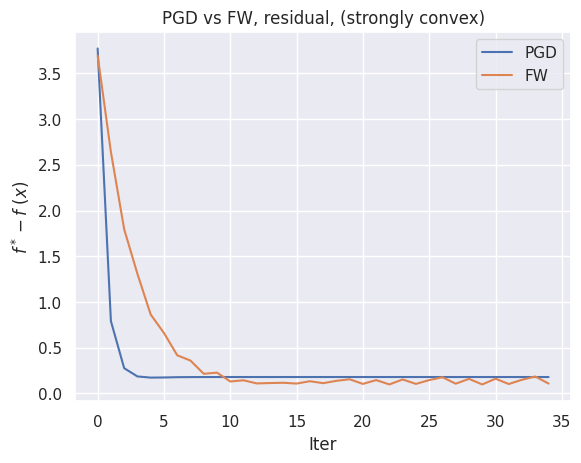

In [ ]:
f, grad_f, A, b, _ = generate_problem(5, mu=1, L=10)
b = b.reshape(-1)

trajectory_ProjGD_strongly, times_per_iter_PGD_strongly = PGD(A, b, x_0, iters, alpha=0.1)
x_star_ProjGD_strongly = np.array(trajectory_ProjGD[-1])

trajectory_FW_strongly, times_per_iter_FW_strongly = FW(A, b, x_0, iters, gamma=0.85)
x_star_FW_strongly = np.array(trajectory_FW[-1])

# Значения целевой функции в оптимальных точках
f_star_ProjGD_strongly = f(x_star_ProjGD, A, b)
f_star_FW_strongly = f(x_star_FW, A, b)

# Массивы невязок
residual_PGD_strongly = [f(x, A, b) - f_star_ProjGD for x in trajectory_ProjGD]
residual_FW_strongly = [f(x, A, b) - f_star_FW for x in trajectory_FW]

plt.plot(residual_PGD_strongly[:35], label='PGD')
plt.plot(residual_FW_strongly[:35], label='FW')
plt.title('PGD vs FW, residual, (strongly convex)')
plt.ylabel(r'$f^*-f \ (x)$')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.show()


Качественно графики по невязке оптимального значения и значения функции на итерации не изменились. FW сходится за то же число итераций, что и для выпуклого случая, что *согласуется с теорией*. В свою очерель метод PGD в сильно выпуклом случае сошёлся чуть быстрее (в выпуклом случае примерно за 5 итераций, в сильно выпуклом за примерно 3).

Теперь давайте посмотрим на время итераций в этом случае:

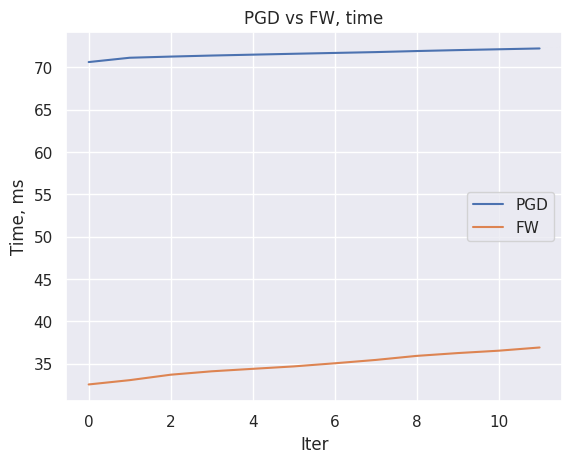

In [ ]:
times_PGD_strongly = np.cumsum(times_per_iter_PGD_strongly)
times_FW_strongly = np.cumsum(times_per_iter_FW_strongly)

plt.plot(times_PGD[:12] * 1000, label='PGD')
plt.plot(times_FW[:12] * 1000, label='FW')
plt.title('PGD vs FW, time')
plt.ylabel('Time, ms')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.show()

Относительно сравнения методов тут ситуация аналогичная.

**<u>Ответ:</u>** все пункты выполнены; реализована проекция вектора на вероятностный симплекс (ссылка на статью, в которой описан алгоритм, приложена в doc-string); рассмотрены и сравнены методы PGD и метод Франк-Вульфа.

# 2. Conjugate gradients

## №2.1 Randomized Preconditioners for Conjugate Gradient Methods

Решаем следующую задачу наименьших квадратов с прямоугольной матрицей A:
$$
f(x) = \frac{1}{2} \|Ax - b\|^2_2 = \frac{1}{2} \sum_{i=1}^m (a_i^T x - b_i)^2,
$$
где $a_i \in \mathbb{R}^n$ есть строчки матрицы $A$.

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import random

def create_row_selection_matrix_jax(m, n, p, key):
    # m is the number of columns in the original matrix A
    # n+p is the number of rows in the row selection matrix R
    # key is a PRNGKey needed for randomness in JAX
    inds = random.permutation(key, m)[:n+p]  # Generate a random permutation and select the first n+p indices
    R = jnp.zeros((n+p, m), dtype=jnp.int32)  # Create a zero matrix of shape (n+p, m)
    R = R.at[jnp.arange(n+p), inds].set(1)     # Use JAX's indexed update to set the entries corresponding to inds to 1
    return np.array(R)

Перейдём сразу к ответу на поставленные вопросы.


1\. Рассчитаем, за сколько операций происходит взятие обратной матрицы $M^{-1}$ по описанному алгоритму. Начнём по порядку.

* Матрица $A^T\Phi^T\in\mathbb{R}^{n\times n+p}$, матрица $\Phi A\in\mathbb{R}^{n+p\times n}$, матрица $A^T\Phi^T\Phi A\in\mathbb{R}^{n\times n}$. Для получения одного элемента последней матрицы необходимо $n+p$  умножений и $n+p-1$ сложений, всего таких элементов $n^2$. Значит, для операции $A^T\Phi^T\Phi A$ необходимо $(2n+2p-1)n^2$ операций.
* Матрица $\Phi \in \mathbb{R}^{n+p\times m}$, матрица $A\in\mathbb{R}^{m\times n}$, их перемножение $\Phi A\in\mathbb{R}^{n+p\times n}$. Для получения одного элемента результирующей матрицы необходимо $m$ умножений и $m-1$ сложений, всего таких элементов $n(n+p)$. Значит, для операции $\Phi A$ необходимо $(2m-1)n(n+p)$ операций.
* Матрица $H_m^{(norm)}\in\mathbb{R}^{m\times m}$, матрица $S\in\mathbb{R}^{m\times m}$ диагональная. Перемножение квадратной матрицы и вектора размера $m$ стоит $(2m-1)m$ операций, перемножение квадратной матрицы и диагональной матрицы размеров $m\times m$ занимает $m^2$ операций (там нет сложений), что означает, что перемножить матрицу на диагональную проще чем умножить её на вектор (для $m>1$, естественно). Перменожение матрицы Адамара на вектор оценивается в $m\cdot logm$ операций, что будет являться верхней оценкой. Значит, для  операции $H_mS$ можем оценить количевто операций как $m\cdot logm$. Нормировка полученной матрицы на число $\frac{1}{\sqrt{m}}$ занимет $m^2$ операций, итого имеем $m\cdot logm+m^2$ операций.
* Row-selection matrix $R\in\mathbb{R}^{n+p\times m}$ далее умножается на матрицу $H_m^{(norm)}S\in\mathbb{R}^{m\times m}$, результат $\Phi\in\mathbb{R}^{n+p\times m}$. Это потребует $(2m-1)m(n+p)$ операций.
* Итого имеем *не более* $\boxed{(m\cdot logm + m^2) + ((2m-1)m(n+p)) + ((2m-1)n(n+p)) + ((2n+2p-1)n^2)}$ операций для вычисления $M^{-1}$ по предложенной схеме.

2\. Для наивного вычисления матрицы $A^TA$ для каждого элемента резульатата потребуется $(2m-1)$ операций, элементов $n^2$ штук. Значит, потребуется $\boxed{(2m-1)n^2}$ операций.

3\. Для перемножения матрицы $A\in\mathbb{R}^{m\times n}$ на вектор $v\in\mathbb{R}^n$ требуется $(2n-1)m$ операций. Результат $Av\in\mathbb{R}^m$. Далее для перемножения матрицы $A^T\in\mathbb{R}^{n\times m}$ на вектор $Av\in\mathbb{R}^m$ потребуется $(2m-1)n$ операций, получитс результат $A^TAv\in\mathbb{R}^n$. Итого для всех действий имеем $\boxed{(2n-1)m + (2m-1)n = 4nm-m-n}$ операций.

4\. Оценим количество FLOPs для метода CG с предобуславливателем (справа) на k итерациях.
$$
\begin{aligned}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \hbox{if } \mathbf{r}_{0} \text{ is sufficiently small, then return } \mathbf{x}_{0} \text{ as the result}\\
& \mathbf{d}_0 := \mathbf{r}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k}{\mathbf{d}_k^\mathsf{T} \mathbf{A d}_k}  \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{d}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A d}_k \\
& \qquad \hbox{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{r}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k} \\
& \qquad \mathbf{d}_{k+1} := \mathbf{r}_{k+1} + \beta_k \mathbf{d}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{aligned} \qquad
\begin{aligned}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \text{if } \mathbf{r}_0 \text{ is sufficiently small, then return } \mathbf{x}_0 \text{ as the result} \\
& \mathbf{z}_0 := \mathbf{M}^{-1} \mathbf{r}_0 \\
& \mathbf{d}_0 := \mathbf{z}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{z}_k}{\mathbf{d}_k^\mathsf{T} \mathbf{A d}_k} \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{d}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A d}_k \\
& \qquad \text{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \mathbf{z}_{k+1} := \mathbf{M}^{-1} \mathbf{r}_{k+1} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{z}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{z}_k} \\
& \qquad \mathbf{d}_{k+1} := \mathbf{z}_{k+1} + \beta_k \mathbf{d}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{aligned}
$$

Тут надо понимать, что на самом деле под матрицей $A$ тут понимается матрица $A^TA\in\mathbb{R}^{n\times n}$ и под вектором $b$ понимается вектор $A^Tb\in\mathbb{R}^n$. Об этой модификации задачи было сказано вначале преамбулы.

* Вычисление $\mathbf{r}_0 = \mathbf{b} - \mathbf{A x}_0$ для вычисления $\mathbf{A x}_0$ требует $2n-1$ операций на каждый элемент из $n$, итого $(2n-1)n$, затем из вектора $\mathbf{b}\in\mathbf{R}^n$ вычесть этот результат займёт ещё $n$ оппераций, значит на этот шаг нужно $2nn-n+n=2n^2$ операций.
* Далле нужна матрица $M^{-1}$, для вычисления которой, как мы выяснили ранее, требуется не более $(m\cdot logm + m^2) + ((2m-1)m(n+p)) + ((2m-1)n(n+p)) + ((2n+2p-1)n^2)$ операций. Если матрица предобуславливателя вычислена заранее, то, возможно, не стоит учитывать этот шаг (я думаю, всё-таки для честности стоит). Затем матрица $M^{-1}\in\mathbb{R}^{n\times n}$ умножается на вектор невязок $\mathbf{r}_0\in\mathbb{R}^n$, это потребует $(2n-1)n$ операций. Итого для инициализации начальных значений перменных для алгоритма потребуется $2n^2 + (m\cdot logm + m^2) + ((2m-1)m(n+p)) + ((2m-1)n(n+p)) + ((2n+2p-1)n^2) + (2n-1)n$ операций.
* Далее идут повторяющиеся шаги алгоритма. Для вычисления чисдителя $\alpha_k$ потребуется $2n-1$ операций. Для знаменателя сначала для вычисления $Ad_k$ потребуется $(2n-1)n$ операций, а затем на скалярное умножение ещё $2n-1$ операций, затем нужно числитель поделить на знаменатель. Это будет в итоге $2n-1 + 2n^2-n + 2n-1 + 1 = 3n+2n^2-1$ операций для вычисления $\alpha_k$. Вектор $Ad_k$ далее можно хранить и не вычислять заново.
* Для шага $x_{k+1}:=x_k+\alpha_kd_k$ потребуется $n$ операций сложения, то же самое и для $r_{k+1}:=r_k-\alpha_kAd_k$ (вектор $Ad_k$ храним в памяти). Всего обновление переменных $x$ и $r$ займёт $2n$ операций.
* Далее для $z_{k+1}=M^{-1}r_{k+1}$ потребуется $(2n-1)n$ операций.
* Для вычисления $\beta_k$ в числителе и знаменателе потребуется по $2n-1$ операций, плюс деление, это ещё одна. В итоге на этом шаге $4n-2+1=4n-1$ операций.
* Для обновления $d_{k+1}=z_{k+1}+\beta_kd_k$ нужно $n$ операций сложения.
* В итоге на одну итерацию имеем $3n+2n^2-1 + 2n + 2n^2-n + 4n-1 + n=4n^2+9n-2$ операций. Для k итераций, соответственно, имеем $k(4n^2+9n-2)$ итераций.
* В итоге для всех итреций и инициализации переменных потребуется $\boxed{k(4n^2+9n-2) + 2n^2 + (m\cdot logm + m^2) + ((2m-1)m(n+p)) + ((2m-1)n(n+p)) + ((2n+2p-1)n^2) + (2n-1)n}$ операций с плавающеей точкой (с учётом инициализации $-$ вычисления $M^{-1}$ и остальных переменных).

Теперь посмотрим сколько нужно вычислений, чтобы решить систему $A^TAx=A^Tb$ напрямую (каким-нибудь стандартным методом). Рассмотрим обычный метод Гаусса (LU-разлодение).

* Разлодение исходной матрицы на нижне- и верхнетрегольную занимает порядка $n^3$ операций.
* Промежуточный шаг нахождения $y$ из $Ly=b$ (прямой ход)требует порядка $\frac{n^2}{2}$ операций.
* Последний шаг $Ux=y$ (Обратный ход) потребует примерно столько же операций, что и предыдущий.
* В итоге имеем асимптотическую оценку $\boxed{\mathcal{O}(n^3)}$ для прямого метода решения системы уравнений.

Для того, чтобы метод CG был заметно более медленным, нужно положить $\boxed{k=n}$, тогда для выполнения k итераций метода мы получим асимптотическую оценку $\mathcal{O}(n^3)$, что являтся таким же медленным как и решение системы уравнений.



5\. Теперь реализуем метод сопряжённых градиентов в предобусловленном и в исходном варианте.

In [ ]:
def CG(A, b, x0, tol=1e-6):
    A_mod, b_mod = A.T @ A, A.T @ b
    x = x0.copy()  # переменная оптимизации
    r = b_mod - A_mod @ x0  # вектор невязок
    r_trajectory = [np.linalg.norm(r)]  # траектория вектора невязок для отображения графика
    if r_trajectory[-1] <= tol:
        return x, np.array(r_trajectory)
    d = r
    while True:
        Ad = A_mod @ d
        alpha = np.dot(r, r) / np.dot(d, Ad)
        x += alpha * d
        r_next = r - alpha * Ad
        r_trajectory.append(np.linalg.norm(r_next))
        if r_trajectory[-1] <= tol:
            return x, np.array(r_trajectory)
        beta = np.dot(r_next, r_next) / np.dot(r, r)
        d = r_next + beta*d
        r = r_next


def CG_precond(A, b, x0, M_inv, tol=1e-6, maxiter=2000):
    """ Метод CG с предобуславливателем"""
    A_mod, b_mod = A.T @ A, A.T @ b
    x = x0.copy()  # переменная оптимизации
    r = b_mod - A_mod @ x0  # вектор невязок
    r_trajectory = [np.linalg.norm(r)]  # траектория вектора невязок для отображения графика
    if r_trajectory[-1] <= tol:
        return x, np.array(r_trajectory)
    z = M_inv @ r
    d = z.copy()
    for _ in range(maxiter):
        Ad = A_mod @ d
        alpha = np.dot(r, z) / np.dot(d, Ad)
        x += alpha * d
        r_next = r - alpha * Ad
        r_trajectory.append(np.linalg.norm(r_next))
        if r_trajectory[-1] <= tol:
            return x, np.array(r_trajectory)
        z_next = M_inv @ r_next
        beta = np.dot(r_next, z_next) / np.dot(r, z)
        d = z_next + beta*d
        r = r_next
        z = z_next

    return x, np.array(r_trajectory)

Теперь решим задачу сначала обычным алгоритмом. Зададим данные задачи:

In [ ]:
from scipy.sparse import diags

# np.random.seed(42)
m = 2**12  # 4096
n = 400
# Create a linear space of values from 0.001 to 100
values = np.linspace(0.001, 100, n)
# Generate the matrix A
A = np.random.randn(m, n) @ diags(values).toarray()
b = np.random.randn(m, 1).flatten()
x0 = np.random.randn(n, 1).flatten()

Работа алгоритма Vanilla CG:

In [ ]:
x_CG, r_CG_trajectory = CG(A, b, x0)
print(r_CG_trajectory[-1])

8.869431789085111e-07


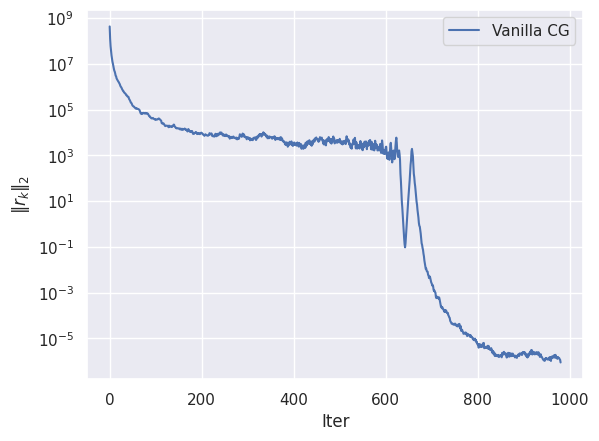

In [ ]:
from matplotlib import pyplot as plt

plt.plot(np.arange(r_CG_trajectory.shape[0]), r_CG_trajectory, label='Vanilla CG')
plt.ylabel(r'$\| r_k \|_2$')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

Для работы предобусловленного CG следует для начала определить матрицу $M^{-1}$, а перед этим $\Phi=RH_m^{(norm)}S$. Сначала определим функцию для получения матрицы Адамара порядка $m$:

In [ ]:
def hadamard_matrix(order):
    """ Рекурсивная функция вычисления нормализованной матрицы Адамара порядка order"""
    if order == 2:
        return np.array([[1, 1],
                         [1, -1]])
    else:
        smaller_hadamard = hadamard_matrix(order // 2)
        top = np.hstack((smaller_hadamard, smaller_hadamard))
        bottom = np.hstack((smaller_hadamard, -smaller_hadamard))
        return np.vstack((top, bottom)) / np.sqrt(order)

Теперь функция для $S = \text{diag}(S_{11}, \ldots, S_{mm})$, где элементы этой диагональной матрицы либо 1, либо -1:

In [ ]:
def create_S(m):
    """ Создаёт диаг. матрицу с элементами +-1 """
    signs = np.random.choice([-1, 1], size=m)  # Генерация массива из m элементов, где каждый элемент равен -1 или 1
    S = np.diag(signs)
    return S

Осталось только определить саму матрицу $M^{-1}$. Для определения $R$, как в преамбуле, положим $p=20$:

In [ ]:
def create_M_inv(A, p=20, key=random.PRNGKey(0)):
    """ Матрица предобуславливателя M^{-1}"""
    m, n = np.shape(A)
    Phi = create_row_selection_matrix_jax(m, n, p, key) @ hadamard_matrix(m) @ create_S(m)
    M_inv = A.T @ Phi.T @ Phi @ A
    return M_inv

Теперь, собственно, запустим CG с предобуславливателем:

In [ ]:
M_inv = create_M_inv(A)
x_CG_precond, r_CG_trajectory_precond = CG_precond(A, b, x0, M_inv)

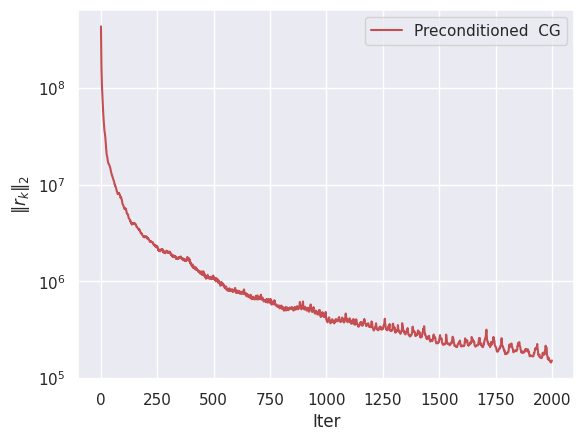

In [ ]:
plt.plot(np.arange(r_CG_trajectory_precond.shape[0]), r_CG_trajectory_precond, label='Preconditioned  CG', color='r')
plt.ylabel(r'$\| r_k \|_2$')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

Видим, что метод CG с предобуславливателем сходислся дольше. Проверим качество разных опттимайзеров на исходной задаче наименьших квадратов:

In [ ]:
print(np.linalg.norm(b - A @ x_CG))
print(np.linalg.norm(b - A @ x_CG_precond))

62.3618396939297
419.48525665729625


Качество решения тоже вышло ниже у предобусловленного метода. Проверим числа обусловленности:

In [ ]:
from scipy.linalg import fractional_matrix_power

A_T_A = A.T @ A
kappa_A_T_A = np.linalg.cond(A_T_A)

M_inv = create_M_inv(A)
M = np.linalg.inv(M_inv)
M_half = fractional_matrix_power(M, 0.5)
M_half_A_T_A_M_half = M_half @ A_T_A @ M_half
kappa_preond = np.linalg.cond(M_half_A_T_A_M_half)

print(f"Число обусловленности A.T @ A: {kappa_A_T_A}")
print(f"Число обусловленности предобусловленной задачи: {kappa_preond}")

Число обусловленности A.T @ A: 12805562007.154696
Число обусловленности предобусловленной задачи: 3444.1014141394453


Однако, что примечательно, число обусловленности с предобуславливателем ниже, что должно ускорять нативный алгоритм. Проверим Идеальный случай, когда $M^{-1}=(A^TA)^{-1}$:

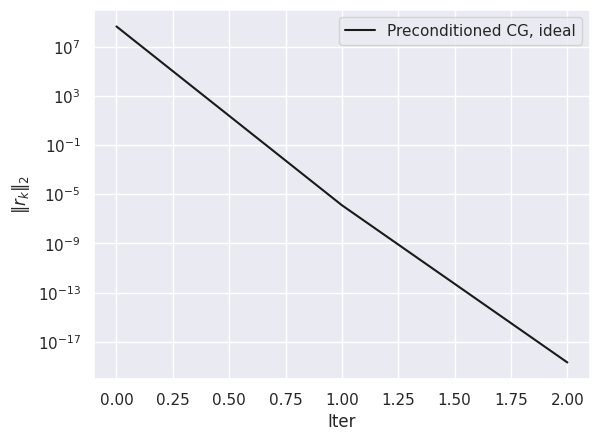

In [ ]:
M_inv = np.linalg.inv(A.T @ A)
x_CG_precond_id, r_CG_trajectory_precond_id = CG_precond(A, b, x0, M_inv)

plt.plot(np.arange(r_CG_trajectory_precond_id.shape[0]), r_CG_trajectory_precond_id, label='Preconditioned CG, ideal', color='k')
plt.ylabel(r'$\| r_k \|_2$')
plt.xlabel('Iter')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

Собственно видно, что алгоритм сошёлся идеально за одну итерацию. Это говорит лишь о том, что какие-то проблемы с определением матрицы $M^{-1}$ в задании. Оно даёт меньшее число обусловленности, но алгоритм от этого быстрее не сходится.

**<u>Ответ:</u>** решена переопределённая задача наименьших квадратов методом сопряжённых градиентов; рассмотрен предобусловленный метод, результаты предобусловленного метода противоречивы (меньшее число обусловленности, но более долгая и менее качественная сходимость); правильность реализации алгоритма проверена на идеальном предобуславливателе $M^{-1}=(A^TA)^{-1}$.

# 3. Newton and quasinewton methods

## №3.1 Newton convergence issue

Рассмотрим функцию:
$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2.
$$

Её градиент $\nabla f(x,y) = \begin{pmatrix}
x^3-2x+2 \\
2(y-1)  \\
\end{pmatrix}$. В точке $(0, 2)^T$ получаем $\nabla f(0,2) = \begin{pmatrix}
2 \\
2  \\
\end{pmatrix}$.

Её гессиан $H_f(x,y)=\begin{pmatrix}
3x^2-2 & 0  \\
0 & 2  \\
\end{pmatrix}$. В точке $(0, 2)^T$ получаем $H_f(0,2)=\begin{pmatrix}
-2 & 0  \\
0 & 2  \\
\end{pmatrix}$.

Значение функции в начальной точке $f(0,2)=1$. Далее сделаем одну итерацию метода Ньютона:
$$
\begin{pmatrix}
x_1 \\
y_1  \\
\end{pmatrix}=\begin{pmatrix}
0 \\
2  \\
\end{pmatrix}-\begin{pmatrix}
-1/2 & 0 \\
0 & 1/2  \\
\end{pmatrix}\begin{pmatrix}
2 \\
2  \\
\end{pmatrix} = \begin{pmatrix}
1 \\
1  \\
\end{pmatrix}
$$

Имеем в этой точке $f(1,1)=1,25>1=f(0,0)$. Значит, итерация метода Ньютона привела к увеличению значения целевой функции.

Объяснить это довольно несложно. Ведь в теореме о сходимости метода Ньютона требовалась как минимум положительная определённость гессиана функции, а в точке $(0, 2)^T$ это не выполняется. Можно ещё рассмотреть так: на каждой итерации метод Ньютона "переходит" в вершину параболы, являющейся тейлоровской аппроксимацией функции второго порядка. В случае отрицательно определённого гессиана эта парабола может направлена вершиной вверх и, соответственно, переход в эту вершину приводит к увеличиению значения функции. Либо же (ещё один возможный сценарий) тейлоровская аппроксимация в настоящей точке может иметь только лишь седловую точку и не иметь точку минимума.

Теперь рассмотрим градиентный спуск и наискорейший спуск. Шаг GD с $\alpha=0.01$:к
$$
\begin{pmatrix}
x_1 \\
y_1  \\
\end{pmatrix}=\begin{pmatrix}
0 \\
2  \\
\end{pmatrix}-0.01\begin{pmatrix}
2 \\
2  \\
\end{pmatrix} = \begin{pmatrix}
-0.02 \\
1.98  \\
\end{pmatrix}
$$

Значение функции в этой точке $f(-0.02, 1.98)\approx0.92<1=f(0,2)$, т.е. значение функции уменьшилось.

Для наискорейшего спуска нужно подобрать значение шага, решив задачу
$$\alpha_k=arg\min_{\alpha\in\mathbb{R}_+}f(x_k-\alpha\nabla f(x_k))$$

Заниматься этим аналитически и получать явную формулу для величины шага, скорее всего громоздко. Поэтому найдём это всё, используя scipy:


In [ ]:
from scipy.optimize import minimize_scalar

def f(x, y):
    return (x**4) / 4 - x**2 + 2*x + (y - 1)**2

def grad_f(x, y):
    return np.array([x**3 - 2*x + 2, 2*(y - 1)])

def objective(alpha, x_prev, grad):
    x_new = x_prev - alpha * grad
    return f(x_new[0], x_new[1])

x_start = np.array([0, 2])
grad = grad_f(x_start[0], x_start[1])

result = minimize_scalar(objective, args=(x_start, grad))

# Значение alpha из steepest descent
alpha_optimal = result.x

# Новая точка с alpha из steepest descent
x_new_steepest = x_start - alpha_optimal * grad

# Значение функции в этой точке
f_new_steepest = f(x_new_steepest[0], x_new_steepest[1])

alpha_optimal, x_new_steepest, f_new_steepest

(0.7937005272563964, array([-1.58740105,  0.41259895]), -3.762203155904598)

Получаем из наискорешего спуска значение $\alpha\approx 0.79$. С таким шагом метода в новой  точке значение функции оказалось $f(-1.58, 0.41)\approx -3.76<1=f(0, 2)$, т.е. действительно значение функции уменьшилось, причём больше, чем для обычного GD.

**<u>Ответ:</u>** проанализировано и сравнено поведение разных методов для предложенной функции и начальной точки; данная задача в очередной раз хорошо подчёркивает колоссальную зависимость метода Ньютона от начального приближения.

## №3.2 Hessian-Free Newton method

В этой задаче рассмотрим оптимизационную задачу бинарной логистической регрессии с использованием различных методов. Необходимые импорты и предоставленный код (некоторые функции уже дописаны, для 4 и 5 пунктов):

In [ ]:
!pip install ucimlrepo
!pip install optax

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import jax
from jax import numpy as jnp, grad
from scipy.optimize import minimize_scalar
import jax.numpy as jnp
from jax import grad, jit, hessian
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from ucimlrepo import fetch_ucirepo
from optax.losses import softmax_cross_entropy as cros_entr
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize_scalar
import sklearn.datasets as skldata

# Set a random seed for reproducibility
np.random.seed(228)
jax.random.PRNGKey(228)

@jit
def logistic_loss(w, X, y, mu=1):
    m, n = X.shape
    return jnp.sum(jnp.logaddexp(0, -y * (X @ w))) / m + mu / 2 * jnp.sum(w**2)

def generate_problem(m=1000, n=300, mu=1):
    X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//2, random_state=0)
    X = jnp.array(X)
    y = jnp.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, y_train, X_test, y_test

def compute_optimal(X, y, mu):
    w = cp.Variable(X.shape[1])
    objective = cp.Minimize(cp.sum(cp.logistic(cp.multiply(-y, X @ w))) / len(y) + mu / 2 * cp.norm(w, 2)**2)
    problem = cp.Problem(objective)
    problem.solve()
    return w.value, problem.value

@jit
def compute_accuracy(w, X, y):
    # Compute predicted probabilities using the logistic (sigmoid) function
    preds_probs = jax.nn.sigmoid(X @ w)
    # Convert probabilities to class predictions: -1 if p < 0.5, else 1
    preds = jnp.where(preds_probs < 0.5, 0, 1)
    # Calculate accuracy as the average of correct predictions
    accuracy = jnp.mean(preds == y)
    return accuracy



# @jit
def compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, mu):
    f = lambda w: logistic_loss(w, X_train, y_train, mu)
    metrics = {
        "f_gap": [jnp.abs(f(x) - f_star) for x in trajectory],
        "x_gap": [jnp.linalg.norm(x - x_star) for x in trajectory],
        "time": times,
        "train_acc": [compute_accuracy(x, X_train, y_train) for x in trajectory],
        "test_acc": [compute_accuracy(x, X_test, y_test) for x in trajectory],
    }
    return metrics

def gradient_descent(w_0, X, y, learning_rate=0.01, num_iters=100, mu=0):
    trajectory = [w_0]
    times = [0]
    w = w_0
    f = lambda w: logistic_loss(w, X, y, mu)
    iter_start = time.time()
    for i in range(num_iters):
        grad_val = grad(f)(w)
        if learning_rate == "linesearch":
            # Simple line search implementation
            phi = lambda alpha: f(w - alpha*grad_val)
            result = minimize_scalar(fun=phi,
                                     bounds=(1e-3, 2e2)
                              )
            step_size = result.x
        else:
            step_size = learning_rate
        w -= step_size * grad_val
        iter_time = time.time()
        trajectory.append(w)
        times.append(iter_time - iter_start)
    return trajectory, times

def newton_method(w_0, X, y, damping=2e-1, num_iters=100, mu=0):
    trajectory = [w_0]
    times = [0]
    w = w_0
    f = lambda w: logistic_loss(w, X, y, mu)

    iter_start = time.time()
    for i in range(num_iters):
        gradient = grad(f)(w)
        hessian_matrix = hessian(f)(w)

        # Reshape the Hessian matrix
        hessian_reshaped = hessian_matrix.reshape(w.size, w.size)

        # Calculate the Newton step using the reshaped Hessian
        newton_step = jnp.linalg.solve(hessian_reshaped, gradient.ravel()).reshape(w.shape)

        # Update parameters using a damping factor
        w -= damping * newton_step

        # Store trajectory and time
        iter_time = time.time()
        trajectory.append(w)
        times.append(iter_time - iter_start)

    return trajectory, times

def newton_method_cg(w_0, X, y, damping=2e-1, num_iters=100, mu=0):
    trajectory = [w_0]
    times = [0]
    w = w_0
    f = lambda w: logistic_loss(w, X, y, mu)

    def VP(v, A):
        return A @ v

    iter_start = time.time()
    for i in range(num_iters):
        gradient = grad(f)(w)
        hessian_matrix = hessian(f)(w)

        # Reshape the Hessian matrix
        hessian_reshaped = hessian_matrix.reshape(w.size, w.size)

        VecP = lambda x: VP(x, A=hessian_reshaped)


        # Calculate the Newton step using the reshaped Hessian
        newton_step, _ = jax.scipy.sparse.linalg.cg(VecP, -gradient)

        # Update parameters using a damping factor
        w += damping * newton_step

        # Store trajectory and time
        iter_time = time.time()
        trajectory.append(w)
        times.append(iter_time - iter_start)

    return trajectory, times

def newton_method_hfn(w_0, X, y, damping=2e-1, num_iters=100, mu=0):
    trajectory = [w_0]
    times = [0]
    w = w_0
    f = lambda w: logistic_loss(w, X, y, mu)

    def HVP(vector, f, point):
      """Hessian-vector product"""
      return grad(lambda point: jnp.vdot(grad(f)(point), vector))(point)

    iter_start = time.time()
    for i in range(num_iters):
        gradient = grad(f)(w)

        # Create a Hessian-vector product operator
        HVecP = lambda x: HVP(x, f=f, point=w)

        # Calculate the Newton step using the reshaped Hessian
        newton_step, _ = jax.scipy.sparse.linalg.cg(HVecP, gradient)

        # Update parameters using a damping factor
        w -= damping * newton_step

        # Store trajectory and time
        iter_time = time.time()
        trajectory.append(w)
        times.append(iter_time - iter_start)

    return trajectory, times

def run_experiments(params):
    mu = params["mu"]
    m, n = params["m"], params["n"]
    methods = params["methods"]
    results = {}

    X_train, y_train, X_test, y_test = generate_problem(m, n, mu)
    n_features = X_train.shape[1]  # Number of features
    params["n_features"] = n_features

    x_0 = jax.random.normal(jax.random.PRNGKey(0), (n_features, ))
    x_star, f_star = compute_optimal(X_train, y_train, mu)

    for method in methods:
        if method["method"] == "GD":
            learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times = gradient_descent(x_0, X_train, y_train, learning_rate, iterations, mu)
            label = method["method"] + " " + str(learning_rate)
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, mu)
        elif method["method"] == "Newton":
            if "learning_rate" not in method.keys():
                learning_rate = 1
            else:
                learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times = newton_method(x_0, X_train, y_train, learning_rate, iterations, mu)
            label = method["method"] + " " + str(learning_rate)
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, mu)
        elif method["method"] == "Newton-CG":
            if "learning_rate" not in method.keys():
                learning_rate = 1
            else:
                learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times = newton_method_cg(x_0, X_train, y_train, learning_rate, iterations, mu)
            label = method["method"] + " " + str(learning_rate)
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, mu)
        elif method["method"] == "Newton-HFN":
            if "learning_rate" not in method.keys():
                learning_rate = 1
            else:
                learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times = newton_method_hfn(x_0, X_train, y_train, learning_rate, iterations, mu)
            label = method["method"] + " " + str(learning_rate)
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, mu)

    return results, params

def plot_results(results, params):
    plt.figure(figsize=(11, 5))
    mu = params["mu"]

    if mu > 1e-2:
        plt.suptitle(f"Strongly convex binary logistic regression. mu={mu}.")
    else:
        plt.suptitle(f"Convex binary logistic regression. mu={mu}.")

    plt.subplot(2, 4, 1)
    for method, metrics in results.items():
        plt.plot(metrics['f_gap'])
    plt.xlabel('Iteration')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 2)
    for method, metrics in results.items():
        plt.plot(metrics['x_gap'], label=method)
    plt.xlabel('Iteration')
    plt.ylabel('$\|x_k - x^*\|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 3)
    for method, metrics in results.items():
        plt.plot(metrics["train_acc"])
    plt.xlabel('Iteration')
    plt.ylabel('Train accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 4)
    for method, metrics in results.items():
        plt.plot(metrics["test_acc"])
    plt.xlabel('Iteration')
    plt.ylabel('Test accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 5)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics['f_gap'])
    plt.xlabel('Time')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 6)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics['x_gap'])
    plt.xlabel('Time')
    plt.ylabel('$\|x_k - x^*\|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 7)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics["train_acc"])
    plt.xlabel('Time')
    plt.ylabel('Train accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 8)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics["test_acc"])
    plt.xlabel('Time')
    plt.ylabel('Test accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    # Place the legend below the plots
    plt.figlegend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.00))
    # Adjust layout to make space for the legend below
    filename = ""
    for method, metrics in results.items():
        filename += method
    filename += f"_{mu}.pdf"
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(filename)
    plt.show()

Сама оптимизационная задача с $l_2$-регуляризацией выглядит так:
$$
\min_w f(w) = \min_w -\sum_{i=1}^n \left[ y_i \log\left(p\left(y_i=1 | x_i; w\right)\right) + \left(1-y_i\right) \log\left(1-p(y_i=1 | x_i; w)\right) \right] + \frac{\mu}{2} \|w\|_2^2.
$$

1\. В этом пункте рассматриваем оптимизацию с помощью градиентного спуска (GD) с постоянным шагом в сильно выпуклой постановке с константой сильной выпуклости $\mu=1$. Наибольший размер шага, обеспечивающий быструю сходимость удалось подобрать равным $\alpha_{GD}^*=0,06$. Таким образом, эксперимент и необходимые графики:

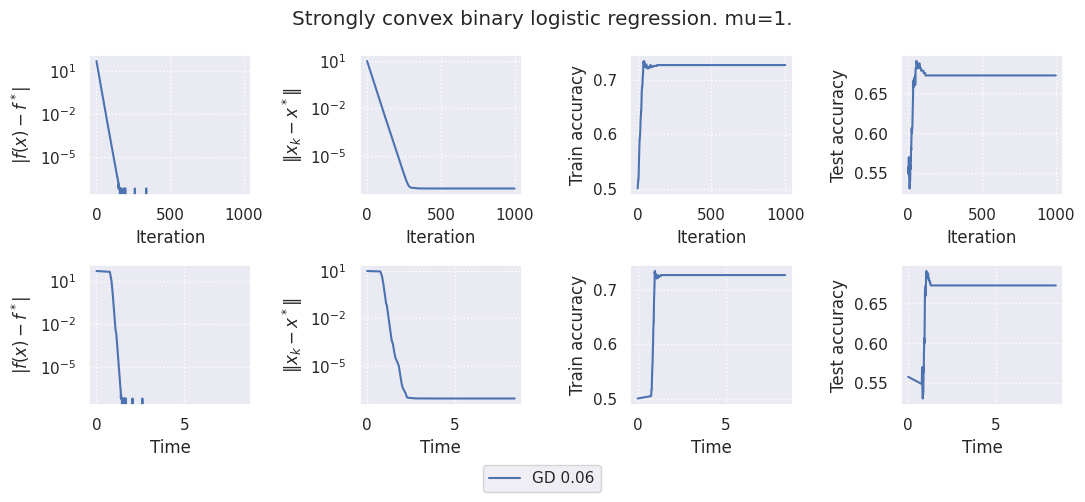

In [ ]:
params = {
    "mu": 1,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "GD",
            "learning_rate": 6e-2,
            "iterations": 1000,
        },
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Таким образом, наблюдаем сублинейную сходимость для данного метода.

2\. Теперь в тех же условиях запустим метод Ньютона. Посотрим на результаты:

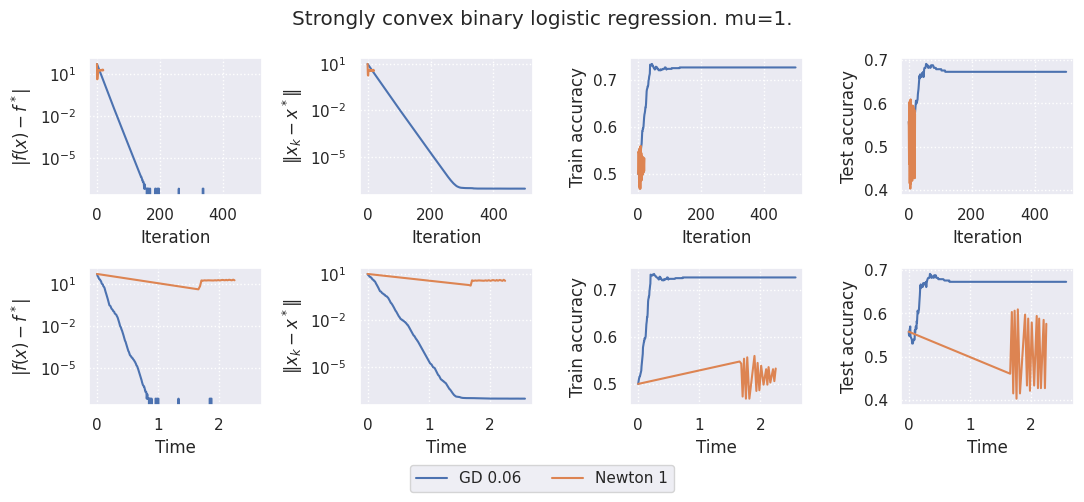

In [ ]:
params = {
    "mu": 1,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "GD",
            "learning_rate": 6e-2,
            "iterations": 500,
        },
        {
            "method": "Newton",
            "iterations": 20,
        },
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Имеем несходимсть у метода Ньютона в таких условиях. В следующем пункте посмотрим на более надёжный алгоритм.

3\. Теперь добавим в рассмотрение демпфированный метод Ньютона. В данном случае наибольший постоянный коэффицент демпфирования, обеспечивающий наискорейшую и при этом стабильную сходимость удалось подобрать равным $\alpha_{DNM}^*=0.6$.

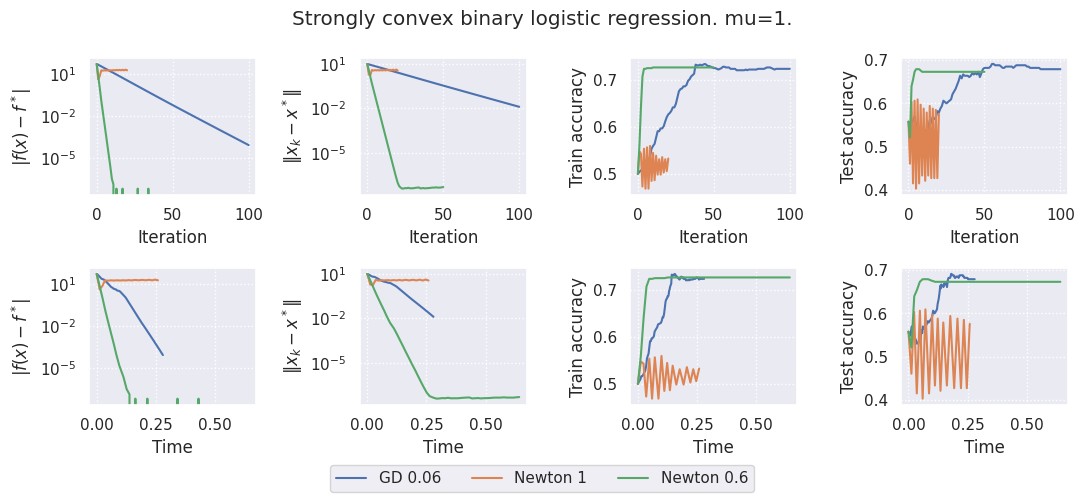

In [ ]:
params = {
    "mu": 1,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "GD",
            "learning_rate": 6e-2,
            "iterations": 100,
        },
        {
            "method": "Newton",
            "iterations": 20,
        },
        {
            "method": "Newton",
            "learning_rate": 6e-1,
            "iterations": 50,
        },
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Видим, что демпфированный метод Ньютона сошёлся за $\approx$20 итераций. Это на порядок быстрее сходящегося ранее метода градиентного спуска с постоянным шагом. Классический метод Ньютона предпочтителен для задач, где функция достаточно "хороша" (гладкая, без резких изменений в кривизне) и начальное приближение находится близко к решению.

4\. Теперь будем рассматривать ту же задачу, но без $l_2$-регуляризации. В данном случае удалось подобрать наибольший шаг, дающий стабильную сходимость равным $\alpha_{GD}^*=0.3$.

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


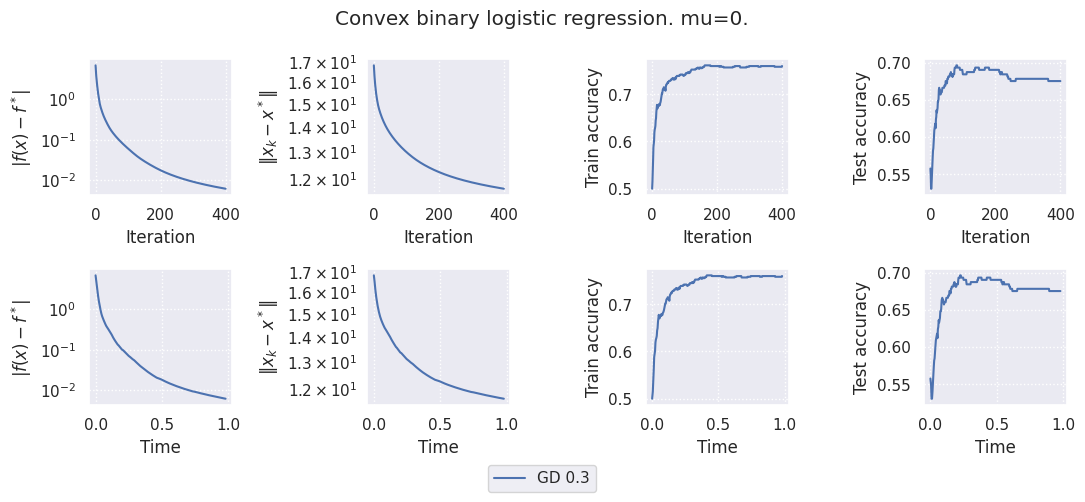

In [ ]:
params = {
    "mu": 0,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "GD",
            "learning_rate": 0.3,
            "iterations": 400,
        }
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

В итоге этот метод за 400 итераций достигает точности $f(x_k) - f^* \approx 10^{-2}$. Увеличим число итераций в 10 раз:

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


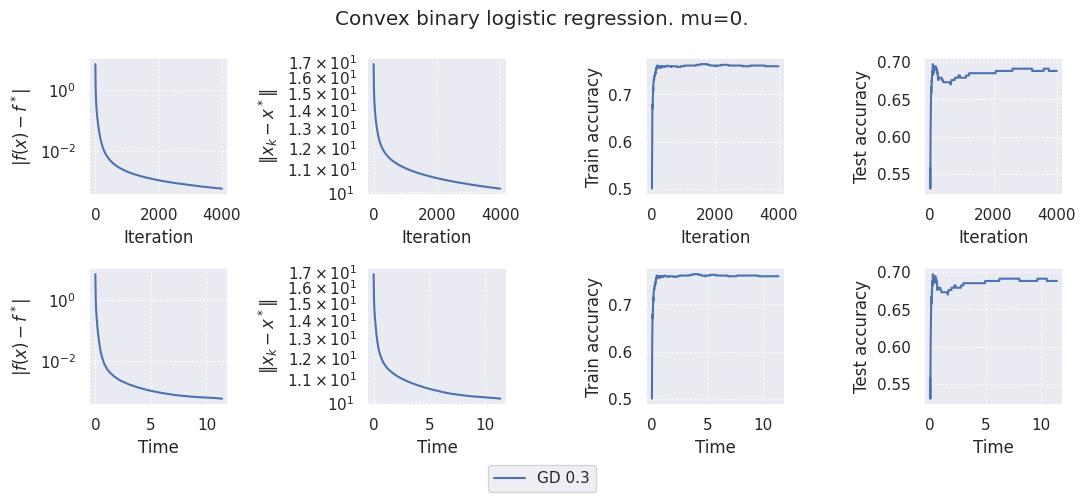

In [ ]:
params = {
    "mu": 0,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "GD",
            "learning_rate": 0.3,
            "iterations": 4000,
        }
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Таким образом получим в 10 раз большую точность. Значит, тут действительно сублинейная сходимость, которая может быть оценена как $\mathcal{O}\left(\frac{1}{n} \right)$ (или по-другому немного, для более точного определения требуется больше численных экспериметов или анализа типа задачи, задача, в первую очередь, немного не об этом).

5\. Теперь посмотрим метод Ньютона и демпфированный метод Ньютона для данной задачи. Для демпфированного наилучшим коэффициентом в этот раз вновь оказался $\alpha_{DNM}^*=0,6$.

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


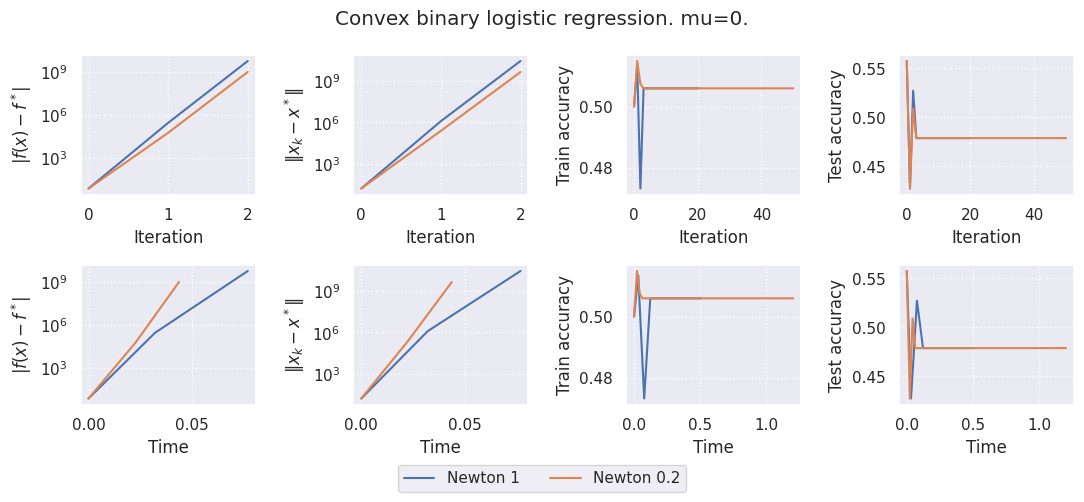

In [ ]:
params = {
    "mu": 0,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "Newton",
            "iterations": 20,
        },
        {
            "method": "Newton",
            "learning_rate": 2e-1,
            "iterations": 50,
        },
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Обычный метод Ньютона при этом снова не сошёлся. Демпфированный также не сошёлся, какие бы параметры я не подбирал. Таким образом, для задачи бинарной логистической регрессии хорошим выбором с $l_2$-регуляризацией будет демпфированный метод Ньютона с хорошо подобранным коэффициентом. Обычный метод Ньютона проявляет нестабильность во всех случаях. Метод градиентного спуска при определенных размерах постоянного шшага проявляет стабильность, однако сходимость на порядок медленнее, чем у демпфированного метода Ньютона в сильно выпуклом случае. Методы второго порядка для данной задачи подходят только в случае применения $l_2$-регуляризации и решения сильно выпуклой задачи.

6\. Теперь снова рассматриваем сильно выпуклую задачу. Чтобы избежать прямого вычисления матрицы Гесса в методе Ньютона, будем использовать метод сопряженных градиентов (CG) для решения линейной системы на шаге Ньютона. Для этого допишем функцию newton_method_cg в первой ячейке и используем jax.scipy.sparse.linalg.cg для нахождения напавления шага. Выбор такого шага основан на минимизации разности функции в точке и её тейлоровской аппроксимации:
$$
f^{II}_{x_0}(x)-f(x_0)=\nabla f(x_0)^T(x-x_0)+\dfrac{1}{2}(x-x_0)^T\nabla f(x_0) (x-x_0)
$$
 Посмотрим на резульататы:

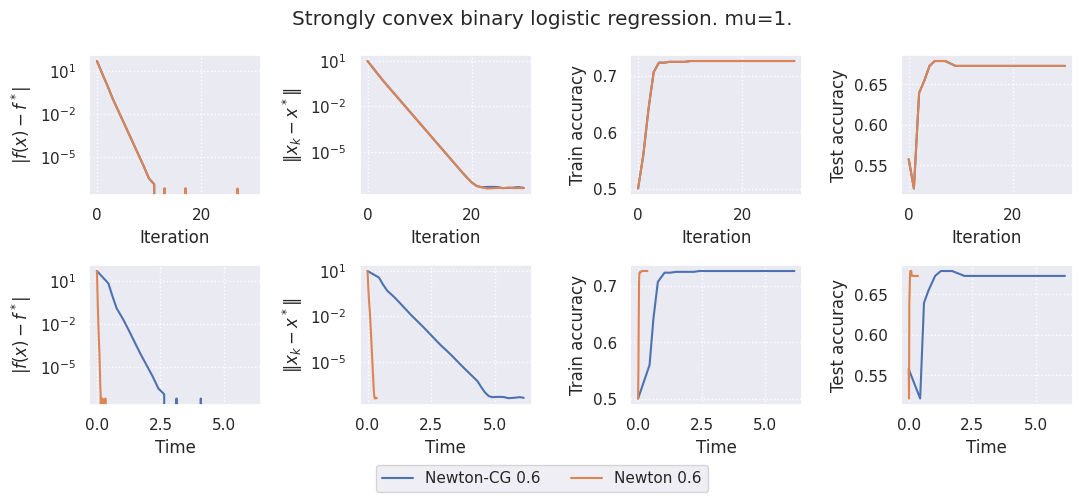

In [ ]:
params = {
    "mu": 1,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "Newton-CG",
            "learning_rate": 6e-1,
            "iterations": 30,
        },
        {
            "method": "Newton",
            "learning_rate": 6e-1,
            "iterations": 30,
        }

    ]
}

results, params = run_experiments(params)
plot_results(results, params)

В данном случае наибольший размер шага, дающий устойчивую сходимость оказался равным $\alpha_{NCG}^*=0,6$. Видим, что демпфированный метод Ньютона на таком шаге сошёлся за те же $\approx$20 итераций. Но обратите внимание на нижнюю строчку графиков. Сходимость эта была соершена за $\approx$4-5 секунд, в то время как для обычного это заняло $\approx$0.2 секунды. Связано это с тем, что, скорее всего, встроенный метод, который находит нам обратный гессиан в нативном демпфированном методе, вычислялся по более эффективным алгоритмам, чем CG, который решал нам систему на нахождение направления $d_k$.

7\. Теперь посмотрим на версию метода Ньютона без гессиана (HFN), которая будет использовать Hessian-vector product. В первой ячейке в функции newton_method_hfn был создан оператор Hessian-vector product на основе функции HVP(vecror, f, point), которая собственно это и делает с помощью автоматического дифференцирования из JAX. При этом явного сохранения гессиана в переменную не происходит, это делается сразу "на лету" и передаётся напрямую в первый позиционный аргумент jax.scipy.sparse.linalg.cg как matmul-compatible object. Таким образом мы экономим память. Запустим три метода второго порядка, в котором по-разному вычисляется гессиан:

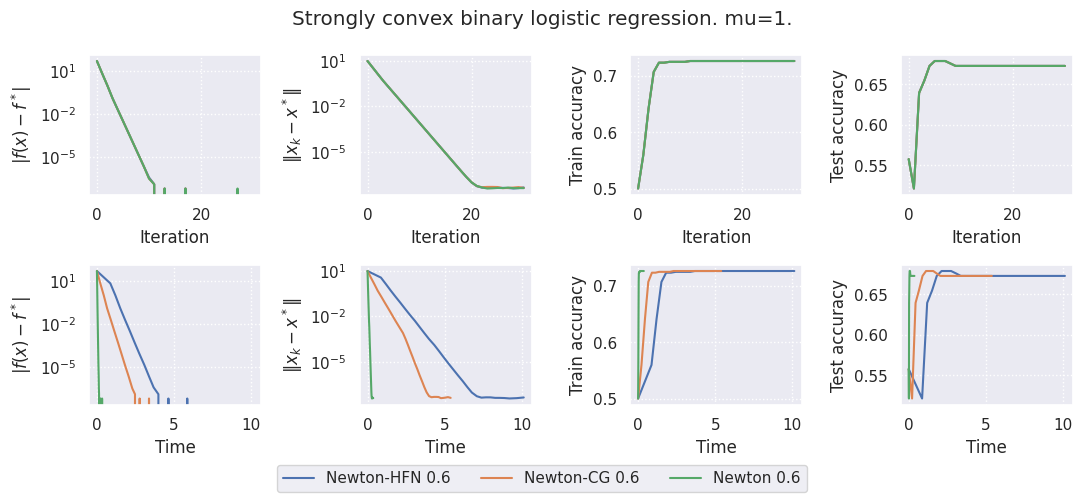

In [ ]:
params = {
    "mu": 1,
    "m": 1000,
    "n": 100,
    "methods": [
        {
            "method": "Newton-HFN",
            "learning_rate": 6e-1,
            "iterations": 30,
        },
        {
            "method": "Newton-CG",
            "learning_rate": 6e-1,
            "iterations": 30,
        },
        {
            "method": "Newton",
            "learning_rate": 6e-1,
            "iterations": 30,
        }

    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Видим, что "по качеству" все они работают одинаково. Для зелёной линии (встроенное вычисление гессиана) имеем самую быструю скорость работы. Для оранжевой (вычисление направления шага в методе Ньютона с помощью CG и вычисленной заблаговременно матрицы Гессе) имеем более медленное время работы. Для синей линии (вычисление направления шага в методе Ньютона с помощью CG и оператора Hessian-vector product) имеем самую медленную работу, однако тут мы значительно экономим память. Экономия памяти в сравнении с первыми двумя методами тут прямо равна значению, необходимому для храненения в памяти матрицы Гессе. Это может быть значительным улучшением в случае, когда у нас большая размерность задачи и в таком случае применение последнего метода сможет значительно сэкономить ресурсы памяти компьютера.

**<u>Ответ:</u>** решена задача бинарной логистической регрессии методами первого и второго порядка; рассмотрены выпуклый и сильно выпуклый случаи; градиентный спуск при адекватном выборе шага стабильно работает, но обладает сравнительно медленной сходимостью; методы второго порядка в данном случае справляются только с сильно выпуклой $l_2$-регуляризованной задачей; рассмотрены и сравнены разные вариации метода Ньютона (демпфированный; находящий направление шага с помощью CG; Hessian-free, позволяющий не хранить в памяти матрицу Гессе и использующий оператор Hessian-vector product для решения системы на поиск направления шага метода).

# 4. Proximal Gradient Method

## №4.1 Proximal Method for Sparse Softmax Regression

1\. Субградиентный метод - это итеративный алгоритм оптимизации для минимизации недифференцируемых выпуклых функций. Шаги алгоритма:




1\. Написать формулировки методов.

**Субградиентный метод** - это итеративный алгоритм оптимизации для минимизации недифференцируемых выпуклых функций. Шаги алгоритма:

* Выбрать начальное приближение и размер шага $\alpha_k$
* Итерации $k=0,1,2,...$
* 1. Вычислить субградиент $g_k\in\partial f(x_k)$
* 2. Сделать шаг $x_{k+1}=x_k-\alpha_k g_k$

Хорошим выбором шага для этого метода часто служит шаг Поляка: $\alpha_k = \dfrac{f(x_k)-f^*}{\|g_k\|^2_2}$.

**Проксимальный метод** обычно используется для оптимизации функций, которые могут быть записаны в виде суммы гладкой выпуклой функции (\phi(x)=f(x)+r(x)) и негладкой выпуклой функции. Шаги алгоритма:
* Выбрать начальное приближение и размер шага $\alpha$
* Итерации $k=0,1,2,...$
* 1. Вычислить $\nabla f(x_k)$
* 2. Сделать шаг $x_{k+1}=prox_{r, \alpha}(x_k-\alpha \nabla f(x_k))$, где

$\text{prox}_{r, \alpha}=arg\min\left[\alpha r(x)+\frac{1}{2}\|x-x_k\|^2_2 \right]-$ проксимальный оператор.

2\. Код, предоставленный в задании, дополненный реализацией двух рассматриваемых методов и функции проксимального оператора:

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import jax
from jax import numpy as jnp, grad
from scipy.optimize import minimize_scalar
import jax.numpy as jnp
from jax import grad, jit, hessian
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from ucimlrepo import fetch_ucirepo
import optax.losses
from optax.losses import softmax_cross_entropy as cros_entr

# Define softmax function
@jit
def softmax(z):
    exp_z = jnp.exp(z - jnp.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

# Define cross-entropy loss
@jit
def cross_entropy_loss_log(w, X, y):
    predictions = X @ w
    n = len(X)
    log_likelihoods = jax.scipy.special.logsumexp(predictions, axis=1)
    cross_entropy = log_likelihoods - jnp.sum(jnp.multiply(predictions, y), axis=1)
    return (1/n) * jnp.sum(cross_entropy)

# Set a random seed for reproducibility
np.random.seed(228)
jax.random.PRNGKey(228)

def compute_optimal(X, y, lam):
    n, d = X.shape
    k = y.shape[1]  # Assuming y is one-hot encoded, number of classes

    # Define the variable for weights
    w = cp.Variable((d, k))

    # Construct the objective
    logits = X @ w
    log_likelihoods = cp.log_sum_exp(logits, axis=1)
    cross_entropy_loss = cp.sum(log_likelihoods) - cp.sum(cp.multiply(y, logits))

    # Add l1 regularization
    l1_reg = lam * cp.sum(cp.abs(w))

    # Total loss
    loss = (1/n) * cross_entropy_loss + l1_reg

    # Define the problem
    problem = cp.Problem(cp.Minimize(loss))

    # Solve the problem
    problem.solve()

    # Extract the optimal weights and minimum loss
    w_star = w.value
    f_star = problem.value

    return w_star, f_star

def generate_problem():
    # Fetch dataset from UCI repository
    dataset = fetch_ucirepo(id=697)

    # Extract features and targets
    X = dataset.data.features.values
    y = dataset.data.targets.values.flatten()

    # Create a mapping from unique labels to integers
    unique_labels = np.unique(y)
    num_classes = len(unique_labels)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}

    # Convert labels to integers using the mapping
    y_integers = jnp.array([label_to_int[label] for label in y])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_integers, test_size=0.33, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # One-hot encoding using jax
    y_train_one_hot = jax.nn.one_hot(y_train, num_classes)
    y_test_one_hot = jax.nn.one_hot(y_test, num_classes)

    return X_train, y_train_one_hot, X_test, y_test_one_hot

def subgradient_descent(w_0, X, y, learning_rate=0.01, num_iters=100, lam=1, f_star=None, tol=None):
    trajectory = [w_0]
    times = [0]
    w = w_0
    f = lambda w: cross_entropy_loss_log(w, X, y)

    if f_star and tol:
      iters=0
      iter_start = time.time()
      for i in range(num_iters):
        if abs(f(w) - f_star) <= tol:
          break
        # Градиент функции потерь
        grad_w = grad(f)(w)
        # Субградиент с L1 регуляризацией
        subgrad_w = grad_w + lam * jnp.sign(w)

        w = w - learning_rate * subgrad_w

        iter_time = time.time()
        trajectory.append(w)
        times.append(iter_time - iter_start)
        iters += 1

      return trajectory, times, iters
    else:
      iter_start = time.time()
      for i in range(num_iters):
          # Градиент функции потерь
          grad_w = grad(f)(w)
          # Субградиент с L1 регуляризацией
          subgrad_w = grad_w + lam * jnp.sign(w)

          w = w - learning_rate * subgrad_w

          iter_time = time.time()
          trajectory.append(w)
          times.append(iter_time - iter_start)
      return trajectory, times

def proximal_operator_l1(w, lam):
    """ Проксимальный оператор для l1-нормы """
    return jnp.sign(w) * jnp.maximum(jnp.abs(w) - lam, 0)

def proximal_gradient_method(w_0, X, y, learning_rate=0.01, num_iters=100, lam=1, f_star=None, tol=None):
    trajectory = [w_0]
    times = [0]
    w = w_0
    f = lambda w: cross_entropy_loss_log(w, X, y)

    if f_star and tol:
      iters = 0
      iter_start = time.time()
      for i in range(num_iters):
        # Градиент гладкой части функции
        grad_w = grad(f)(w)
        # Шаг градиентного спуска
        w = w - learning_rate * grad_w
        # Шаг проксимального метода с применением проксимального оператора
        w = proximal_operator_l1(w, lam * learning_rate)
        if abs(f(w) - f_star) <= tol:
          break
        iter_time = time.time()
        trajectory.append(w)
        times.append(iter_time - iter_start)
        iters += 1
      return trajectory, times, iters
    else:
      iter_start = time.time()
      for i in range(num_iters):
          # Градиент гладкой части функции
          grad_w = grad(f)(w)
          # Шаг градиентного спуска
          w = w - learning_rate * grad_w
          # Шаг проксимального метода с применением проксимального оператора
          w = proximal_operator_l1(w, lam * learning_rate)

          iter_time = time.time()
          trajectory.append(w)
          times.append(iter_time - iter_start)
      return trajectory, times

# Compute accuracy
def compute_accuracy(w, X, y):
    predictions = softmax(X @ w)
    predicted_classes = jnp.argmax(predictions, axis=1)
    true_classes = jnp.argmax(y, axis=1)
    accuracy = jnp.mean(predicted_classes == true_classes)
    return accuracy

# Compute metrics
def compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, lam):
    f = lambda w: cross_entropy_loss_log(w, X_train, y_train) + lam * jnp.sum(jnp.abs(w))
    metrics = {
        "f_gap": [jnp.abs(f(x) - f_star) for x in trajectory],
        "x_gap": [jnp.linalg.norm(x - x_star) for x in trajectory],
        "time": times,
        "train_acc": [compute_accuracy(x, X_train, y_train) for x in trajectory],
        "test_acc": [compute_accuracy(x, X_test, y_test) for x in trajectory],
        "sparsity": [jnp.mean(jnp.abs(x) < 1e-5) for x in trajectory]
    }
    return metrics

def run_experiments(params):
    lam = params["lam"]
    methods = params["methods"]
    results = {}

    X_train, y_train, X_test, y_test = generate_problem()
    n_features = X_train.shape[1]
    n_classes = len(y_train[0])
    params["n_features"], params["n_classes"] = n_features, n_classes

    x_0 = jax.random.normal(jax.random.PRNGKey(0), (n_features, n_classes))
    x_star, f_star = compute_optimal(X_train, y_train, lam)
    print(f"Optimal accuracy {compute_accuracy(x_star, X_train, y_train)}")

    for method in methods:
        if method["method"] == "Subgrad":
            learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times = subgradient_descent(x_0, X_train, y_train, learning_rate, iterations, lam)
            label = method["method"] + f" lr {learning_rate:.2f}"
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, lam)
        elif method["method"] == "Proximal":
            learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times = proximal_gradient_method(x_0, X_train, y_train, learning_rate, iterations, lam)
            label = method["method"] + f" lr {learning_rate:.2f}"
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, lam)

    return results, params

def plot_results(results, params):
    plt.figure(figsize=(11, 5))
    lam = params["lam"]

    plt.suptitle(f"Convex multiclass regression. lam={lam}.")

    plt.subplot(2, 4, 1)
    for method, metrics in results.items():
        plt.plot(metrics['f_gap'])
    plt.xlabel('Iteration')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 2)
    for method, metrics in results.items():
        plt.plot(metrics['x_gap'], label=method + f" sparsity {metrics['sparsity'][-1]:.3f}")
    plt.xlabel('Iteration')
    plt.ylabel('$\|x_k - x^*\|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 3)
    for method, metrics in results.items():
        plt.plot(metrics["train_acc"])
    plt.xlabel('Iteration')
    plt.ylabel('Train accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 4)
    for method, metrics in results.items():
        plt.plot(metrics["test_acc"])
    plt.xlabel('Iteration')
    plt.ylabel('Test accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 5)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics['f_gap'])
    plt.xlabel('Time')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 6)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics['x_gap'])
    plt.xlabel('Time')
    plt.ylabel('$\|x_k - x^*\|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 7)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics["train_acc"])
    plt.xlabel('Time')
    plt.ylabel('Train accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(2, 4, 8)
    for method, metrics in results.items():
        plt.plot(metrics["time"], metrics["test_acc"])
    plt.xlabel('Time')
    plt.ylabel('Test accuracy')
    # plt.yscale('log')
    plt.grid(linestyle=":")

    # Place the legend below the plots
    plt.figlegend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.00))
    # Adjust layout to make space for the legend below
    filename = ""
    for method, metrics in results.items():
        filename += method
    filename += f"_{lam}.pdf"
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(filename)
    plt.show()

Поясним за выбор такого проксимального оператора. На занятии было показано, что проксимальный оператор для $l_1$-нормы $\lambda\|x\|_1$:
$$
[prox_r(x)]_i=[|x_i|-λ]_+\cdot sign(x_i).
$$

Положим сначала $\lambda=0$. Подберём сначала лучший learning rate для субградиентного метода, запустив несколько одинаковых экспериментов с разными значениями:

Optimal accuracy 0.7817139029502869


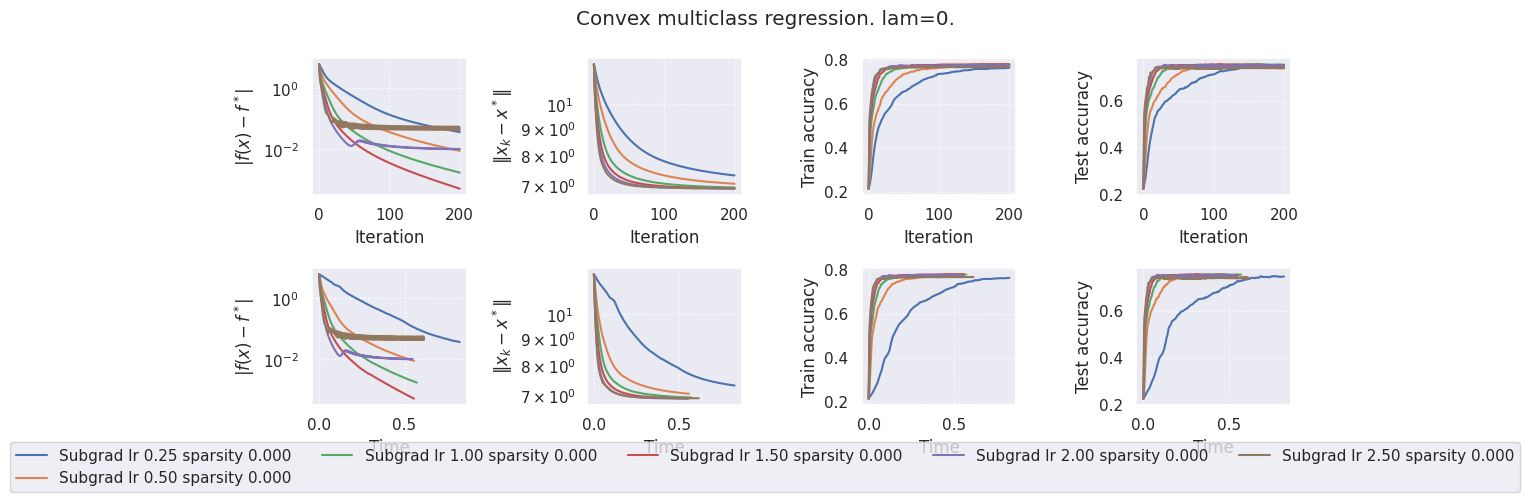

In [ ]:
params = {
    "lam": 0,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 0.25,
            "iterations": 200,
        },
        {
            "method": "Subgrad",
            "learning_rate": 0.5,
            "iterations": 200,
        },
        {
            "method": "Subgrad",
            "learning_rate": 0.5,
            "iterations": 200,
        },
        {
            "method": "Subgrad",
            "learning_rate": 1,
            "iterations": 200,
        },
        {
            "method": "Subgrad",
            "learning_rate": 1.5,
            "iterations": 200,
        },
        {
            "method": "Subgrad",
            "learning_rate": 2,
            "iterations": 200,
        },
        {
            "method": "Subgrad",
            "learning_rate": 2.5,
            "iterations": 200,
        }
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Стабильным и приемлимо быстрым оказался learning rate, равный 1.5. Его будем использовать далее для субградиентного метода

Сделаем то же самое для проксимального метода:

Optimal accuracy 0.7817139029502869


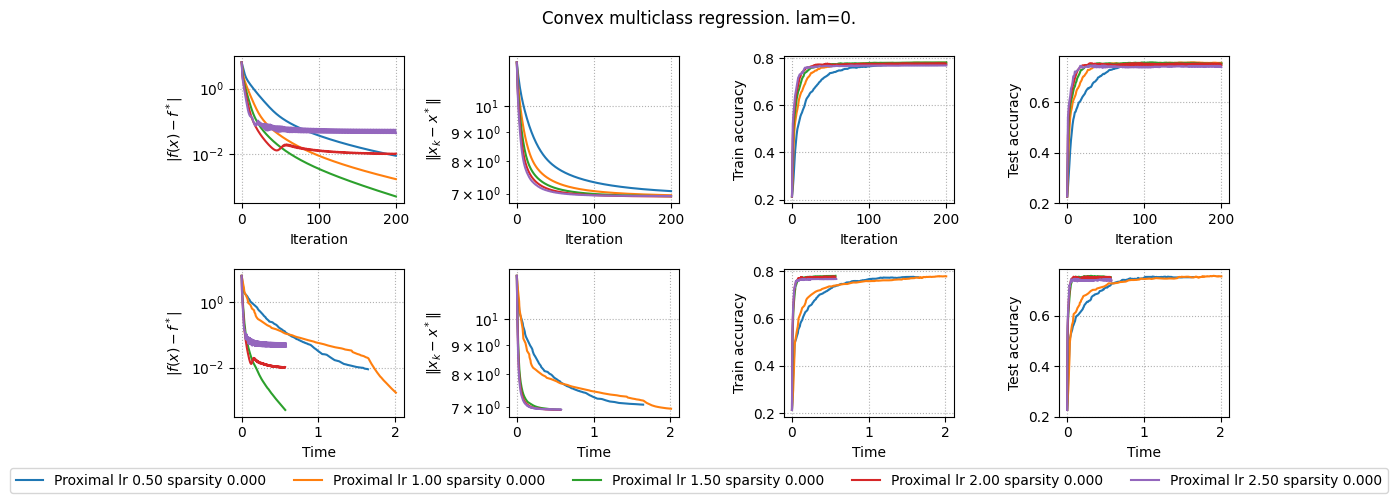

In [ ]:
params = {
    "lam": 0,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 0.5,
            "iterations": 200,
        },
        {
            "method": "Proximal",
            "learning_rate": 0.5,
            "iterations": 200,
        },
        {
            "method": "Proximal",
            "learning_rate": 1,
            "iterations": 200,
        },
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 200,
        },
        {
            "method": "Proximal",
            "learning_rate": 2,
            "iterations": 200,
        },
        {
            "method": "Proximal",
            "learning_rate": 2.5,
            "iterations": 200,
        }
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Тут ситуация аналогичная, берём 1.5.

Теперь сравним два этих метода:

Optimal accuracy 0.7817139029502869


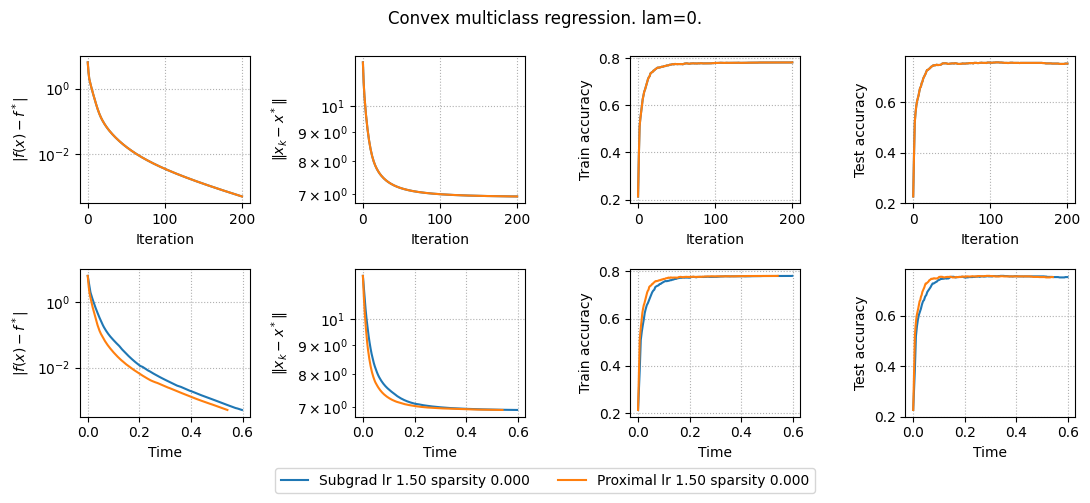

In [ ]:
params = {
    "lam": 0,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 1.5,
            "iterations": 200,
        },
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 200,
        },
    ]
}

results, params = run_experiments(params)
plot_results(results, params)

Видим, что методы по итерациям в каком-то смысле тождественны, когда регуляризации нет. Однако проксимальный метод несколько более быстрый по времени для оптимизации функции.

3\. Теперь будем смотреть на работу этих методов с параметрами из таблицы и постепенно заполлнять её. Для этого модифицируем run_experiments() для получения нужной нам информации:

In [ ]:
def compute_accuracy(w, X, y):
    predictions = softmax(X @ w)
    predicted_classes = jnp.argmax(predictions, axis=1)
    true_classes = jnp.argmax(y, axis=1)
    accuracy = jnp.mean(predicted_classes == true_classes)
    return accuracy

# Compute metrics
def compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, lam):
    f = lambda w: cross_entropy_loss_log(w, X_train, y_train) + lam * jnp.sum(jnp.abs(w))
    metrics = {
        "f_gap": [jnp.abs(f(x) - f_star) for x in trajectory],
        "x_gap": [jnp.linalg.norm(x - x_star) for x in trajectory],
        "time": times,
        "train_acc": [compute_accuracy(x, X_train, y_train) for x in trajectory],
        "test_acc": [compute_accuracy(x, X_test, y_test) for x in trajectory],
        "sparsity": [jnp.mean(jnp.abs(x) < 1e-5) for x in trajectory]
    }
    return metrics

def run_experiments(params):
    lam = params["lam"]
    methods = params["methods"]
    tol = params["tol"]
    results = {}

    X_train, y_train, X_test, y_test = generate_problem()
    n_features = X_train.shape[1]
    n_classes = len(y_train[0])
    params["n_features"], params["n_classes"] = n_features, n_classes

    x_0 = jax.random.normal(jax.random.PRNGKey(0), (n_features, n_classes))
    x_star, f_star = compute_optimal(X_train, y_train, lam)
    print(f"Optimal accuracy {compute_accuracy(x_star, X_train, y_train)}")
    print(f"Tolerance: {tol}", f"lambda: {lam}")

    for method in methods:
        if method["method"] == "Subgrad":
            learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times, iters = subgradient_descent(x_0, X_train, y_train, learning_rate, iterations, lam, f_star, tol)
            label = method["method"] + f" lr {learning_rate:.2f}"
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, lam)
            print("#------------------------------------------------#")
            print(label)
            print(f"Iterations: {iters}")
            print(f"Sparcity: {results[label]['sparsity'][-1]}")
            print(f"Final test accuracy: {results[label]['test_acc'][-1]}")
            print("#------------------------------------------------#")
        elif method["method"] == "Proximal":
            learning_rate = method["learning_rate"]
            iterations = method["iterations"]
            trajectory, times, iters = proximal_gradient_method(x_0, X_train, y_train, learning_rate, iterations, lam, f_star, tol)
            label = method["method"] + f" lr {learning_rate:.2f}"
            results[label] = compute_metrics(trajectory, x_star, f_star, times, X_train, y_train, X_test, y_test, lam)
            print("#------------------------------------------------#")
            print(label)
            print(f"Iterations: {iters}")
            print(f"Sparcity: {results[label]['sparsity'][-1]}")
            print(f"Final test accuracy: {results[label]['test_acc'][-1]}")
            print("#------------------------------------------------#")

    return results, params

Всё, осталось прогнать это по всем случаям из таблицы. Будем теперь для каждого такого случая запускать эксперимент в отдельной ячейке и фиксировать в таблицу. Извиняюсь за дальнейшую громоздкость, возможно, это можно было бы офомить более лакончино. "iterations" в params в дальнейшем понимаем как "max_iter".

In [ ]:
params = {
    "tol": 1e-1,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.1 lambda: 0.01
#------------------------------------------------#
Subgrad lr 1.50
Iterations: 12
Sparcity: 0.0
Final test accuracy: 0.6910958886146545
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.01 lambda: 0.01
#------------------------------------------------#
Subgrad lr 1.50
Iterations: 16
Sparcity: 0.0
Final test accuracy: 0.7191780805587769
#------------------------------------------------#


В дальнейшем для больших точностей субградиентный спуск из-за сублинейного характера сходимости при прежнем лучшем learning_rate=1.5 отрабатывает все max_iter, поэтому будем повышать learning_rate, чтобы достичь требуемой точности.

In [ ]:
params = {
    "tol": 1e-3,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 2.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.001 lambda: 0.01
#------------------------------------------------#
Subgrad lr 2.50
Iterations: 376
Sparcity: 0.0
Final test accuracy: 0.7294520735740662
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-4,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 3,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.0001 lambda: 0.01
#------------------------------------------------#
Subgrad lr 3.00
Iterations: 10000
Sparcity: 0.0
Final test accuracy: 0.7232877016067505
#------------------------------------------------#


Видим, что разумное увеличение постоянного learning_rate не помогло, отработка за max_iter итераций. Оставим так. В таблице пометим количество итераций как ">10000".

In [ ]:
params = {
    "tol": 1e-5,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 2.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 1e-05 lambda: 0.01
#------------------------------------------------#
Subgrad lr 2.50
Iterations: 10000
Sparcity: 0.0
Final test accuracy: 0.7390410900115967
#------------------------------------------------#


Теперь для той же $\lambda=0.01$ посмотрим на работу проксимального метода:

In [ ]:
params = {
    "tol": 1e-1,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.1 lambda: 0.01
#------------------------------------------------#
Proximal lr 1.50
Iterations: 12
Sparcity: 0.04629629850387573
Final test accuracy: 0.6890411376953125
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.01 lambda: 0.01
#------------------------------------------------#
Proximal lr 1.50
Iterations: 15
Sparcity: 0.0833333358168602
Final test accuracy: 0.715753436088562
#------------------------------------------------#


У проксимального метода тоже сублинейная сходимость, поэтому в дальнейшем повышаем learning_rate.

In [ ]:
params = {
    "tol": 1e-3,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 2,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.001 lambda: 0.01
#------------------------------------------------#
Proximal lr 2.00
Iterations: 11
Sparcity: 0.0833333358168602
Final test accuracy: 0.7130137085914612
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-4,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 2.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 0.0001 lambda: 0.01
#------------------------------------------------#
Proximal lr 2.50
Iterations: 10000
Sparcity: 0.5092592835426331
Final test accuracy: 0.7410959005355835
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-5,
    "lam": 1e-2,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 2.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7763157486915588
Tolerance: 1e-05 lambda: 0.01
#------------------------------------------------#
Proximal lr 2.50
Iterations: 10000
Sparcity: 0.5092592835426331
Final test accuracy: 0.7410959005355835
#------------------------------------------------#


Видим, что хотя и сходимость к требуемой высокой точности крайне низкая, но мы получаем при этом гораздо более разреденные решения.

Далее смотрим на оба метода с параметром $\lambda=0.001$:

In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1e-3,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7827260494232178
Tolerance: 0.01 lambda: 0.001
#------------------------------------------------#
Subgrad lr 1.50
Iterations: 39
Sparcity: 0.0
Final test accuracy: 0.7547945380210876
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1e-3,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7827260494232178
Tolerance: 0.01 lambda: 0.001
#------------------------------------------------#
Proximal lr 1.50
Iterations: 38
Sparcity: 0.009259259328246117
Final test accuracy: 0.7527397274971008
#------------------------------------------------#


Теперь для $\lambda=0.1$:

In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1e-1,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7371794581413269
Tolerance: 0.01 lambda: 0.1
#------------------------------------------------#
Subgrad lr 1.50
Iterations: 63
Sparcity: 0.0
Final test accuracy: 0.6054794788360596
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1e-1,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.7371794581413269
Tolerance: 0.01 lambda: 0.1
#------------------------------------------------#
Proximal lr 1.50
Iterations: 5
Sparcity: 0.5833333134651184
Final test accuracy: 0.5691781044006348
#------------------------------------------------#


Ну и, наконец, для $\lambda=1$:

In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1,
    "methods": [
        {
            "method": "Subgrad",
            "learning_rate": 2.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.31545206904411316
Tolerance: 0.01 lambda: 1
#------------------------------------------------#
Subgrad lr 2.50
Iterations: 10000
Sparcity: 0.0
Final test accuracy: 0.5534246563911438
#------------------------------------------------#


In [ ]:
params = {
    "tol": 1e-2,
    "lam": 1,
    "methods": [
        {
            "method": "Proximal",
            "learning_rate": 1.5,
            "iterations": 10000,
        }
    ]
}

results, params = run_experiments(params)

Optimal accuracy 0.31545206904411316
Tolerance: 0.01 lambda: 1
#------------------------------------------------#
Proximal lr 1.50
Iterations: 1
Sparcity: 0.8518518805503845
Final test accuracy: 0.43561646342277527
#------------------------------------------------#


Выводы, в целом, следующие. Субградиентный спуск практически не не даёт разреженных решений. Для проксимального метода чем выше параметр регуляризации, тем более разреженное решение мы получаем, но при этом имеем меньшую точность на тестовой выборке. Ну и, соответственно, наоборот также. Итоговая таблица:

| Method                    | Learning Rate (η) | Tolerance (ε) | Number of Iterations | Comment (if any) | Final Sparsity of the solution (λ) | Final test accuracy |
|---------------------------|--------------------|---------------|----------------------|------------------|-------------------------------------|---------------------|
| Subgradient Descent       | 1.5                | 10<sup>-1</sup> | 12                   |                  | 0.0                                 | 0.691               |
| Subgradient Descent       | 1.5                | 10<sup>-2</sup> | 16                   |                  | 0.0                                 | 0.719               |
| Subgradient Descent       | 2.5                | 10<sup>-3</sup> | 376                  |                  | 0.0                                 | 0.729               |
| Subgradient Descent       | 2.5                | 10<sup>-4</sup> | >10000               |                  | 0.0                                 | 0.723               |
| Subgradient Descent       | 2.5                | 10<sup>-5</sup> | >10000               |                  | 0.0                                 | 0.739               |
| Proximal Gradient Descent | 1.5                | 10<sup>-1</sup> | 12                   |                  | 0.046                               | 0.689               |
| Proximal Gradient Descent | 1.5                | 10<sup>-2</sup> | 15                   |                  | 0.083                               | 0.716               |
| Proximal Gradient Descent | 2                  | 10<sup>-3</sup> | 11                   |                  | 0.083                               | 0.713               |
| Proximal Gradient Descent | 2.5                | 10<sup>-4</sup> | >10000               |                  | 0.509                               | 0.741               |
| Proximal Gradient Descent | 2.5                | 10<sup>-5</sup> | >10000               |                  | 0.509                               | 0.741               |
| Subgradient Descent       | 1.5                | 10<sup>-2</sup> | 39                   |                  | 0.0                                 | 0.755               |
| Proximal Gradient Descent | 1.5                | 10<sup>-2</sup> | 38                   |                  | 0.090                               | 0.753               |
| Subgradient Descent       | 1.5                | 10<sup>-2</sup> | 63                   |                  | 0.0                                 | 0.605               |
| Proximal Gradient Descent | 1.5                | 10<sup>-2</sup> | 5                    |                  | 0.583                               | 0.569               |
| Subgradient Descent       | 2.5                | 10<sup>-2</sup> | >10000               |                  | 0.0                                 | 0.553               |
| Proximal Gradient Descent | 1.5                | 10<sup>-2</sup> | 1                    |                  | 0.852                               | 0.436               |

**<u>Ответ:</u>** реализованы и проанализированы метод субградиентного спуска и проксимальный метод; рассмотрена задача softmax regression с и без $l_1$ регуляризации; составлена таблица получаемых с помошью методов метрик решений при разной настройке гиперпараметров и параметров задачи.

# 5. Stochastic gradient methods

## №5.1 Variance reduction for stochastic gradient methods for neural networks

1\. Сначала рассмотрим задачу логистичиской регрессии. Код, приложенный в задании (с уже реализованными методами и вспомогательными функциями):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import jax
from jax import numpy as jnp, grad
import sklearn.datasets as skldata
import warnings

warnings.filterwarnings('ignore')

# Set a random seed for reproducibility
np.random.seed(228)
jax.random.PRNGKey(228)

def logistic_loss(w, X, y, mu=1):
    m, n = X.shape
    return jnp.sum(jnp.logaddexp(0, -y * (X @ w))) / m + mu / 2 * jnp.sum(w**2)

def logistic_loss_particle(w, X, y, idxs, mu=1):
    batch_size = np.shape(idxs)[0]
    X_batch = X[idxs]
    y_batch = y[idxs]
    return jnp.sum(jnp.logaddexp(0, -y_batch * (X_batch @ w))) / batch_size + mu / 2 * jnp.sum(w**2)


def generate_problem(m=1000, n=300, mu=1):
    X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//2, random_state=0)
    X = jnp.array(X)
    y = jnp.array(y)
    return X, y

def compute_optimal(X, y, mu):
    w = cp.Variable(X.shape[1])
    objective = cp.Minimize(cp.sum(cp.logistic(cp.multiply(-y, X @ w))) / len(y) + mu / 2 * cp.norm(w, 2)**2)
    problem = cp.Problem(objective)
    problem.solve()
    return w.value, problem.value

def stochastic_gradient_descent(X, y, x_0, learning_rate, iterations, batch_size=1, mu=0):
    m, n = X.shape
    x = x_0
    flops = 0
    trajectory = [x]
    flops_trajectory = [flops]
    for _ in range(iterations):
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch, y_batch = X[indices], y[indices]
        f_batch = lambda w: logistic_loss(w, X=X_batch, y=y_batch, mu=mu)
        grad_f_batch = grad(f_batch)
        x -= learning_rate * grad_f_batch(x)
        trajectory.append(x)
        flops += (2 * n * batch_size + n)
        flops_trajectory.append(flops)
    return trajectory, flops_trajectory

def sag(X, y, x_0, learning_rate, iterations, batch_size=1, mu=1):
    m, n = X.shape
    x = x_0
    gradients = jnp.zeros((m, n))
    average_grad = jnp.zeros(n)
    flops = 0
    trajectory = [x]
    flops_trajectory = [flops]

    for _ in range(iterations):
        indices = np.random.choice(m, batch_size, replace=False)
        new_grads = []
        for idx in indices:
            f_i = lambda w: logistic_loss(w, X[idx:idx+1], y[idx:idx+1], mu=mu)
            grad_f_i = grad(f_i)
            new_grad = grad_f_i(x)
            new_grads.append((idx, new_grad))

        new_grads = [(idx, jnp.array(new_grad)) for idx, new_grad in new_grads]
        grad_diffs = jnp.array([new_grad - gradients[idx] for idx, new_grad in new_grads])
        average_grad += jnp.sum(grad_diffs, axis=0) / m
        for idx, new_grad in new_grads:
            gradients = gradients.at[idx].set(new_grad)

        x -= learning_rate * average_grad

        trajectory.append(x)
        flops += (2 * n * batch_size + n)
        flops_trajectory.append(flops)

    return trajectory, flops_trajectory


def svrg(X, y, x_0, learning_rate, epoch_length, iterations, batch_size=1, mu=0):
    m, n = X.shape
    x = x_0
    trajectory = [x]
    flops = 0
    flops_trajectory = [flops]

    for _ in range(iterations // epoch_length):
        # Полный градиент
        full_grad = grad(lambda w: logistic_loss(w, X=X, y=y, mu=mu))(x)
        x_snapshot = x.copy()

        for _ in range(epoch_length):
            indices = np.random.choice(m, batch_size, replace=False)
            # Градиент в текущей точке
            f_batch = lambda w: logistic_loss_particle(w, X=X, y=y, idxs=indices, mu=mu)
            grad_f_batch = grad(f_batch)
            grad_at_x = grad_f_batch(x)

            # Градиент в snapshot point
            grad_at_snapshot = grad_f_batch(x_snapshot)

            # Шаг подитерации SVRG
            x -= learning_rate * (grad_at_x - grad_at_snapshot + full_grad)

            # Update trajectory and flops
            trajectory.append(x)
            flops += (4 * n * batch_size + 2 * n)
            flops_trajectory.append(flops)

    return trajectory, flops_trajectory

def compute_metrics(trajectory, x_star, f_star, f, flops_trajectory):
    metrics = {
        "f_gap": [jnp.abs(f(x) - f_star) for x in trajectory],
        "x_gap": [jnp.linalg.norm(x - x_star) for x in trajectory],
        "flops": flops_trajectory,
    }
    return metrics

def run_experiments(params):
    m, n, mu = params["m"], params["n"], params["mu"]
    methods = params["methods"]
    results = {}

    X, y = generate_problem(m, n, mu)
    x_0 = jax.random.normal(jax.random.PRNGKey(0), (n,))
    # Compute the optimal solution using CVXPY
    x_star, f_star = compute_optimal(X, y, mu)

    for method_params in methods:
        method = method_params["method"]
        if method == "SGD":
            trajectory, flops_trajectory = stochastic_gradient_descent(
                X, y, x_0, method_params["learning_rate"], method_params["iterations"], method_params["batch_size"], mu
            )
        elif method == "SAG":
            trajectory, flops_trajectory = sag(
                X, y, x_0, method_params["learning_rate"], method_params["iterations"], method_params["batch_size"], mu
            )
        elif method == "SVRG":
            trajectory, flops_trajectory = svrg(
                X, y, x_0, method_params["learning_rate"], method_params["epoch_length"], method_params["iterations"], method_params["batch_size"], mu
            )
        label = f"{method} batch {method_params['batch_size']}"
        results[label] = compute_metrics(trajectory, x_star, f_star, f=lambda x: logistic_loss(x, X, y, mu), flops_trajectory=flops_trajectory)
    return results

def plot_results(results, params):
    plt.figure(figsize=(10, 3.5))
    mu = params["mu"]
    m = params["m"]
    n = params["n"]

    if mu > 1e-2:
        plt.suptitle(f"Strongly convex binary logistic regression. m={m}, n={n}, mu={mu}.")
    else:
        plt.suptitle(f"Convex binary logistic regression. m={m}, n={n}, mu={mu}.")

    plt.subplot(1, 3, 1)
    for method, metrics in results.items():
        plt.plot(metrics['f_gap'])
    plt.xlabel('Iteration')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(1, 3, 2)
    for method, metrics in results.items():
        plt.plot(metrics['x_gap'], label=method)
    plt.xlabel('Iteration')
    plt.ylabel('$\|x_k - x^*\|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(1, 3, 3)
    for method, metrics in results.items():
        plt.plot(metrics["flops"], metrics['f_gap'])
    plt.xlabel('FLOPS')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    # Place the legend below the plots
    plt.figlegend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.00))
    # Adjust layout to make space for the legend below
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(f"sgd_{mu}_{m}_{n}.pdf")
    plt.show()

В ячейке выше реализованы методы SAG и SVRG.
* В методе SVRG совершаются внешние "дорогие" итерации, на которых считается весь градиент и "дешёвые" итерации по длинне эпохи, на  которых каждый раз делаются шаги SGD по правилу $x_t=x_{t-1}-\alpha [\nabla f(\tilde{x})+(\nabla f_{i_t}(x_{t-1})-\nabla f_{i_t}(\tilde{x}))]$, где градиенты $\nabla f_{i_t}$ считаются для выборки $i_t$ размера batch_size.
* В методе SAG на каждой итерации случайно выбирается подмножество индексов данных размером batch_size, для которых рассчитываются новые градиенты. Затем обновляется среднее значение градиента с учетом новых и старых градиентов по формуле.

Давайте посмотрим на их работу для задачи бинарной лог регрессии в выпуклом случае. Запустим с параметрами, приложенными в условии задания на 1000 итераций:

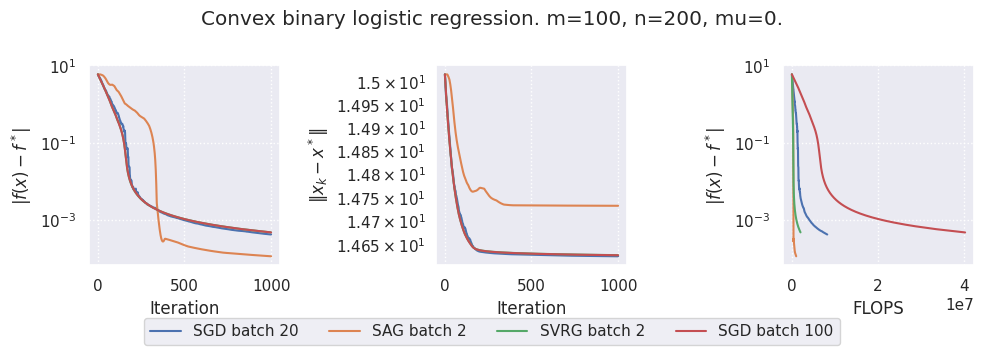

In [ ]:
params = {
    "mu": 0,
    "m": 100,
    "n": 200,
    "methods": [
        {
            "method": "SGD",
            "learning_rate": 1e-2,
            "batch_size": 20,
            "iterations": 1000,
        },
        {
            "method": "SAG",
            "learning_rate": 1e-2,
            "batch_size": 2,
            "iterations": 1000,
        },
        {
            "method": "SVRG",
            "learning_rate": 1e-2,
            "epoch_length": 3,
            "batch_size": 2,
            "iterations": 1000,
        },
        {
            "method": "SGD",
            "learning_rate": 1e-2,
            "batch_size": 100,
            "iterations": 1000,
        },
    ]
}

results = run_experiments(params)
plot_results(results, params)

Видим, что SVRG даёт похожие на обычный SGD решения с примерно тем же качеством. SAG даёт немного другое решение, но начиная с $\approx$400 итерации качество того, к чему он сходится, начинает превосходить остальные методы. Также SAG эффективнее всех по вычислениям. Самым затратным оказался SGD с полным батчем (т.е. обычный GD), SVRG менее затратен, чем SGD с батчем 20, SAG самый эффективный.

Теперь посмотрим сильно выпуклый случай с параметрами из условия задачи на 500 итераций:

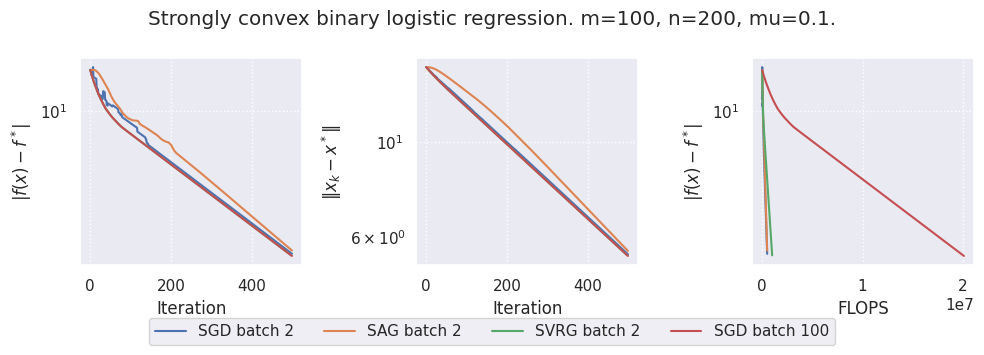

In [ ]:
params = {
    "mu": 1e-1,
    "m": 100,
    "n": 200,
    "methods": [
        {
            "method": "SGD",
            "learning_rate": 2e-2,
            "batch_size": 2,
            "iterations": 500,
        },
        {
            "method": "SAG",
            "learning_rate": 2e-2,
            "batch_size": 2,
            "iterations": 500,
        },
        {
            "method": "SVRG",
            "learning_rate": 2e-2,
            "epoch_length": 3,
            "batch_size": 2,
            "iterations": 500,
        },
        {
            "method": "SGD",
            "learning_rate": 2e-2,
            "batch_size": 100,
            "iterations": 500,
        },
    ]
}

results = run_experiments(params)
plot_results(results, params)

Здесь уже имеем более однородную картину. Метод SAG сходится несколько медленнее, но при этом всё ещё отсаётся вычислительно эффективным и превосходит SVRG по этому показателю.

2\. Далее рассмотрим задачу наименьших квадратов. На основе первой ячейки задания сделаем новую для новой задачи (изменем целевую функцию и немного подписи графиков):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import jax
from jax import numpy as jnp, grad
import sklearn.datasets as skldata
import warnings

warnings.filterwarnings('ignore')

# Set a random seed for reproducibility
np.random.seed(228)
jax.random.PRNGKey(228)

def LSP(w, X, y, mu=1):
    m, n = X.shape
    r = X @ w - y
    return jnp.sum(r ** 2) / (2 * m) + mu / 2 * jnp.sum(w ** 2)

def LSP_particle(w, X, y, idxs, mu=1):
    batch_size = np.shape(idxs)[0]
    X_batch = X[idxs]
    y_batch = y[idxs]
    residuals = X_batch @ w - y_batch
    return jnp.sum(residuals ** 2) / (2 * batch_size) + mu / 2 * jnp.sum(w ** 2)

def generate_problem(m=1000, n=300, mu=1):
    X, y = skldata.make_regression(n_features=n, n_samples=m, noise=1e-3, random_state=0)
    X = jnp.array(X)
    y = jnp.array(y)
    return X, y

def compute_optimal(X, y, mu):
    w = cp.Variable(X.shape[1])
    residuals = X @ w - y
    objective = cp.Minimize(cp.sum_squares(residuals) / (2 * len(y)) + mu / 2 * cp.norm(w, 2)**2)
    problem = cp.Problem(objective)
    problem.solve()
    return w.value, problem.value

def stochastic_gradient_descent(X, y, x_0, learning_rate, iterations, batch_size=1, mu=0):
    m, n = X.shape
    x = x_0
    flops = 0
    trajectory = [x]
    flops_trajectory = [flops]
    for _ in range(iterations):
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch, y_batch = X[indices], y[indices]
        f_batch = lambda w: LSP(w, X=X_batch, y=y_batch, mu=mu)
        grad_f_batch = grad(f_batch)
        x -= learning_rate * grad_f_batch(x)
        trajectory.append(x)
        flops += (2 * n * batch_size + n)
        flops_trajectory.append(flops)
    return trajectory, flops_trajectory

def sag(X, y, x_0, learning_rate, iterations, batch_size=1, mu=1):
    m, n = X.shape
    x = x_0
    gradients = jnp.zeros((m, n))
    average_grad = jnp.zeros(n)
    flops = 0
    trajectory = [x]
    flops_trajectory = [flops]

    for _ in range(iterations):
        indices = np.random.choice(m, batch_size, replace=False)
        new_grads = []
        for idx in indices:
            f_i = lambda w: LSP(w, X[idx:idx+1], y[idx:idx+1], mu=mu)
            grad_f_i = grad(f_i)
            new_grad = grad_f_i(x)
            new_grads.append((idx, new_grad))

        new_grads = [(idx, jnp.array(new_grad)) for idx, new_grad in new_grads]
        grad_diffs = jnp.array([new_grad - gradients[idx] for idx, new_grad in new_grads])
        average_grad += jnp.sum(grad_diffs, axis=0) / m
        for idx, new_grad in new_grads:
            gradients = gradients.at[idx].set(new_grad)

        x -= learning_rate * average_grad

        trajectory.append(x)
        flops += (2 * n * batch_size + n)
        flops_trajectory.append(flops)

    return trajectory, flops_trajectory


def svrg(X, y, x_0, learning_rate, epoch_length, iterations, batch_size=1, mu=0):
    m, n = X.shape
    x = x_0
    trajectory = [x]
    flops = 0
    flops_trajectory = [flops]

    for _ in range(iterations // epoch_length):
        # Полный градиент
        full_grad = grad(lambda w: LSP(w, X=X, y=y, mu=mu))(x)
        x_snapshot = x.copy()

        for _ in range(epoch_length):
            indices = np.random.choice(m, batch_size, replace=False)
            # Градиент в текущей точке
            f_batch = lambda w: LSP_particle(w, X=X, y=y, idxs=indices, mu=mu)
            grad_f_batch = grad(f_batch)
            grad_at_x = grad_f_batch(x)

            # Градиент в snapshot point
            grad_at_snapshot = grad_f_batch(x_snapshot)

            # Шаг подитерации SVRG
            x -= learning_rate * (grad_at_x - grad_at_snapshot + full_grad)

            # Update trajectory and flops
            trajectory.append(x)
            flops += (4 * n * batch_size + 2 * n)
            flops_trajectory.append(flops)

    return trajectory, flops_trajectory

def compute_metrics(trajectory, x_star, f_star, f, flops_trajectory):
    metrics = {
        "f_gap": [jnp.abs(f(x) - f_star) for x in trajectory],
        "x_gap": [jnp.linalg.norm(x - x_star) for x in trajectory],
        "flops": flops_trajectory,
    }
    return metrics

def run_experiments(params):
    m, n, mu = params["m"], params["n"], params["mu"]
    methods = params["methods"]
    results = {}

    X, y = generate_problem(m, n, mu)
    x_0 = jax.random.normal(jax.random.PRNGKey(0), (n,))
    # Compute the optimal solution using CVXPY
    x_star, f_star = compute_optimal(X, y, mu)

    for method_params in methods:
        method = method_params["method"]
        if method == "SGD":
            trajectory, flops_trajectory = stochastic_gradient_descent(
                X, y, x_0, method_params["learning_rate"], method_params["iterations"], method_params["batch_size"], mu
            )
        elif method == "SAG":
            trajectory, flops_trajectory = sag(
                X, y, x_0, method_params["learning_rate"], method_params["iterations"], method_params["batch_size"], mu
            )
        elif method == "SVRG":
            trajectory, flops_trajectory = svrg(
                X, y, x_0, method_params["learning_rate"], method_params["epoch_length"], method_params["iterations"], method_params["batch_size"], mu
            )
        label = f"{method} batch {method_params['batch_size']}"
        results[label] = compute_metrics(trajectory, x_star, f_star, f=lambda x: LSP(x, X, y, mu), flops_trajectory=flops_trajectory)
    return results

def plot_results(results, params):
    plt.figure(figsize=(10, 3.5))
    mu = params["mu"]
    m = params["m"]
    n = params["n"]

    if mu > 1e-2:
        plt.suptitle(f"Strongly convex quadratics. m={m}, n={n}, mu={mu}.")
    else:
        plt.suptitle(f"Convex quadratics. m={m}, n={n}, mu={mu}.")

    plt.subplot(1, 3, 1)
    for method, metrics in results.items():
        plt.plot(metrics['f_gap'])
    plt.xlabel('Iteration')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(1, 3, 2)
    for method, metrics in results.items():
        plt.plot(metrics['x_gap'], label=method)
    plt.xlabel('Iteration')
    plt.ylabel('$\|x_k - x^*\|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    plt.subplot(1, 3, 3)
    for method, metrics in results.items():
        plt.plot(metrics["flops"], metrics['f_gap'])
    plt.xlabel('FLOPS')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.yscale('log')
    plt.grid(linestyle=":")

    # Place the legend below the plots
    plt.figlegend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.00))
    # Adjust layout to make space for the legend below
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(f"sgd_{mu}_{m}_{n}.pdf")
    plt.show()

Запустим алгоритмы на параметрах из условия задачи в выпуклом случае для 1000 итераций:

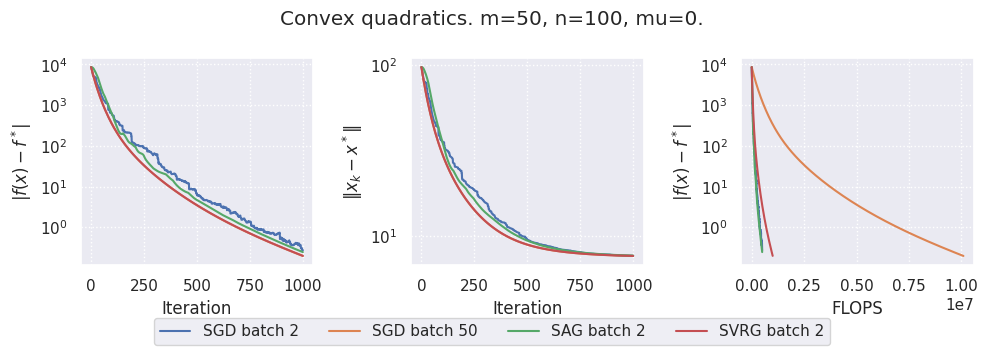

In [ ]:
params = {
    "mu": 0,
    "m": 50,
    "n": 100,
    "methods": [
        {
            "method": "SGD",
            "learning_rate": 1e-2,
            "batch_size": 2,
            "iterations": 1000,
        },
        {
            "method": "SGD",
            "learning_rate": 1e-2,
            "batch_size": 50,
            "iterations": 1000,
        },
        {
            "method": "SAG",
            "learning_rate": 1e-2,
            "batch_size": 2,
            "iterations": 1000,
        },
        {
            "method": "SVRG",
            "learning_rate": 1e-2,
            "epoch_length": 2,
            "batch_size": 2,
            "iterations": 1000,
        },
    ]
}

results = run_experiments(params)
plot_results(results, params)

Видим примерно аналогичную ситуацию. Все методы хорошо справляются с задачей, наиболее эффективны по вычислениям SGD и SAG.

Теперь рассмотрим сильно выпуклый случай с параметрами из условия задачи:

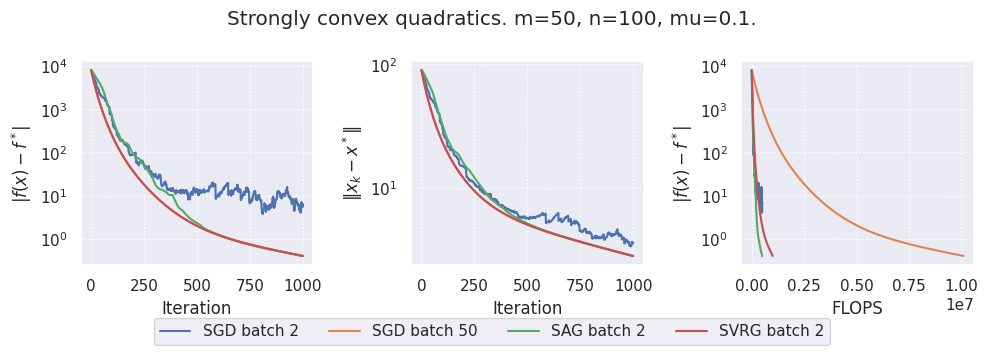

In [ ]:
params = {
    "mu": 1e-1,
    "m": 50,
    "n": 100,
    "methods": [
        {
            "method": "SGD",
            "learning_rate": 1e-2,
            "batch_size": 2,
            "iterations": 1000,
        },
        {
            "method": "SGD",
            "learning_rate": 1e-2,
            "batch_size": 50,
            "iterations": 1000,
        },
        {
            "method": "SAG",
            "learning_rate": 1e-2,
            "batch_size": 2,
            "iterations": 1000,
        },
        {
            "method": "SVRG",
            "learning_rate": 1e-2,
            "epoch_length": 2,
            "batch_size": 2,
            "iterations": 1000,
        },
    ]
}

results = run_experiments(params)
plot_results(results, params)

Здесь уже классический метод SGD проигрывает более продвинутым SAG и SVRG. По сходимости они практически такие же эффектиынве, как и SGD с полным батчем, но замето превосходят его по количеству вычислений.

**<u>Ответ:</u>** реализованы методы SAG и SVRG; проанализированы различные методы стохастической оптимизации на примере их работы в задаче бинарной логистической регрессии и задаче наименьших квадратов.